<a href="https://colab.research.google.com/github/Lovejeet-Singh-31/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#First thing first importing the necessary libraries. 
##Following are the libraries:-

1.   NumPy
2.   Pandas
3.   Matplotlib
4.   Seaborn
5.   Scikit Learn




In [1]:
#imorting important libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

# setting max display column limit to 30
pd.set_option("display.max_columns", 30)

import warnings
warnings.filterwarnings('ignore')
from numpy import math

##Now we are ready to mount the google drive using following code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#After mounting the gdrive we are ready to load our dataset.
we have Online retail data.In which we have diffrent observations which give us some intuition about different segmentation.


In [3]:
# Read The Datset "Online Retail"
# Use Panda Library To read The Excel file
retail_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Online Retail Customer Segmentation - Lovejeet Singh/Online Retail.xlsx')

##Now checking the shape of our DataFrames which helps to get an idea to know the number of rows and columns present in our both DataFrames.

In [4]:
#Checking the Number of rows and columns using Shape methods
retail_df.shape

(541909, 8)

#We have 541909 observations/Rows and 8 Features.

#Getting a glimps of our dataset using Head Function. 

In [5]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
retail_df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

#Using info() method we can easily get the idea of what kind of data type and null values inside our dataframes we have.

In [7]:
# checking the datatypes and null values in dataset
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Observations**
* # There are null values in CustomerID and Description.
* # Datatype of InvoiceDate is object need to convert it into datatime.
 

In [8]:
# Let's check the null values count.
retail_df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

#So, as we can see that in CustomerID we have 135080 null values and description feature has 1454 null values.

#We have to drop these null values. 

In [9]:
#droping null values 
retail_df.dropna(inplace=True)

In [10]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


#Checking the shape of our dataset after removing null values.

In [11]:
retail_df.shape

(406829, 8)

#After removeing null value in our dataset .it reduces to (406829, 8)

##Now we can see the numeric value and its aggregations like mean,mode,max and median using Describe method

In [12]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

*  # the Quantity feature shows negative value which is not possible.
*  # UnitPrice has 0 as min value.
*  # We have to explore thses feature.

In [13]:
# dataframe have negative valiues in quantity.
retail_df[retail_df['Quantity']<0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154    2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235    2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237    2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                    ...        ...         ...             ...  
540449 2011-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541 2011-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715 2011-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717 2011-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8905 rows x 8 columns]

#We have 8905 observation which shows negative quantity or order cancellation. So, we have to remove those rows.

In [14]:
# changing the datatype to str
retail_df['InvoiceNo'] = retail_df['InvoiceNo'].astype('str')

In [15]:
# also If InvoiceNo starts with C means it's a cancellation. We need to drop this entries.
retail_df = retail_df[~retail_df['InvoiceNo'].str.contains('C')]

#Now checking the shape after removing negative quantity or order cancellation rows.

In [16]:
retail_df.shape

(397924, 8)

#Now exploring the unitPrice feature which also shows minimum value as 0.

In [17]:
# Checking how many values are present for unitprice==0
# almost 40 values are present so will drop this values
len(retail_df[retail_df['UnitPrice']==0])

40

In [18]:
# taking unitprice values greater than 0.
retail_df = retail_df[retail_df['UnitPrice']>0]

#Now checking the shape of our final dataset.

In [19]:
retail_df.shape

(397884, 8)

#So, finally we have 397884 observation and 8 features.

In [20]:
retail_df.describe()

Quantity      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

#Getting the columns

In [21]:
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **Feature Engineering**

#we have to make new feature from are datetime feature.

In [22]:
# Converting InvoiceDate to datetime. InvoiceDate is in format of 01-12-2010 08:26.
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format="%d-%m-%Y %H:%M")

#Extracting year, Month, Day, Hour and Minute.

In [23]:
#decomposing datetime feature
retail_df["year"] = retail_df["InvoiceDate"].apply(lambda x: x.year)
retail_df["month_num"] = retail_df["InvoiceDate"].apply(lambda x: x.month)
retail_df["day_num"] = retail_df["InvoiceDate"].apply(lambda x: x.day)
retail_df["hour"] = retail_df["InvoiceDate"].apply(lambda x: x.hour)
retail_df["minute"] = retail_df["InvoiceDate"].apply(lambda x: x.minute)

In [24]:
# extracting month from the Invoice date
retail_df['Month']=retail_df['InvoiceDate'].dt.month_name()

In [25]:
# extracting day from the Invoice date
retail_df['Day']=retail_df['InvoiceDate'].dt.day_name()

# In our dataset we have quantity and unitprice so we can make a new feature totalAmount by multiple both the column 

In [26]:
retail_df['TotalAmount'] = retail_df['Quantity'] * retail_df['UnitPrice']

#We also know that we have a feature called hour so we have to label them as Morning, Afternoon and Evening.

In [27]:
def time(time):
  '''This function takes time and return time frame label fro example morning, afternoon and evening.'''
  if (time==6 or time==7 or time==8 or time==9 or time==10 or time==11) :
    return'Morning'
  elif (time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'   

In [28]:
retail_df['Day_time_type'] = retail_df['hour'].apply(time)

In [29]:
retail_df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount Day_time_type  
0        1     8      26  December  Wednesday        15.30       Morning  
1        1     8      26  December  Wednesday        20.34       Morning  
2        1     8      26  December  Wednesday        22.00       Morning  
3        1     8      26  December  Wednesday        20.34       Morning  
4        1     8      26  December  Wednesday        20.34       Morning

# **EDA(Exploratory Data Analysis)**

#Finding the top ten product.

In [30]:
#getting top 10 product/description
top_10_product = retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_product

Product_name  Count
0  WHITE HANGING HEART T-LIGHT HOLDER   2028
1            REGENCY CAKESTAND 3 TIER   1723
2             JUMBO BAG RED RETROSPOT   1618
3       ASSORTED COLOUR BIRD ORNAMENT   1408
4                       PARTY BUNTING   1396
5             LUNCH BAG RED RETROSPOT   1316
6   SET OF 3 CAKE TINS PANTRY DESIGN    1159
7             LUNCH BAG  BLACK SKULL.   1105
8                             POSTAGE   1099
9     PACK OF 72 RETROSPOT CAKE CASES   1068

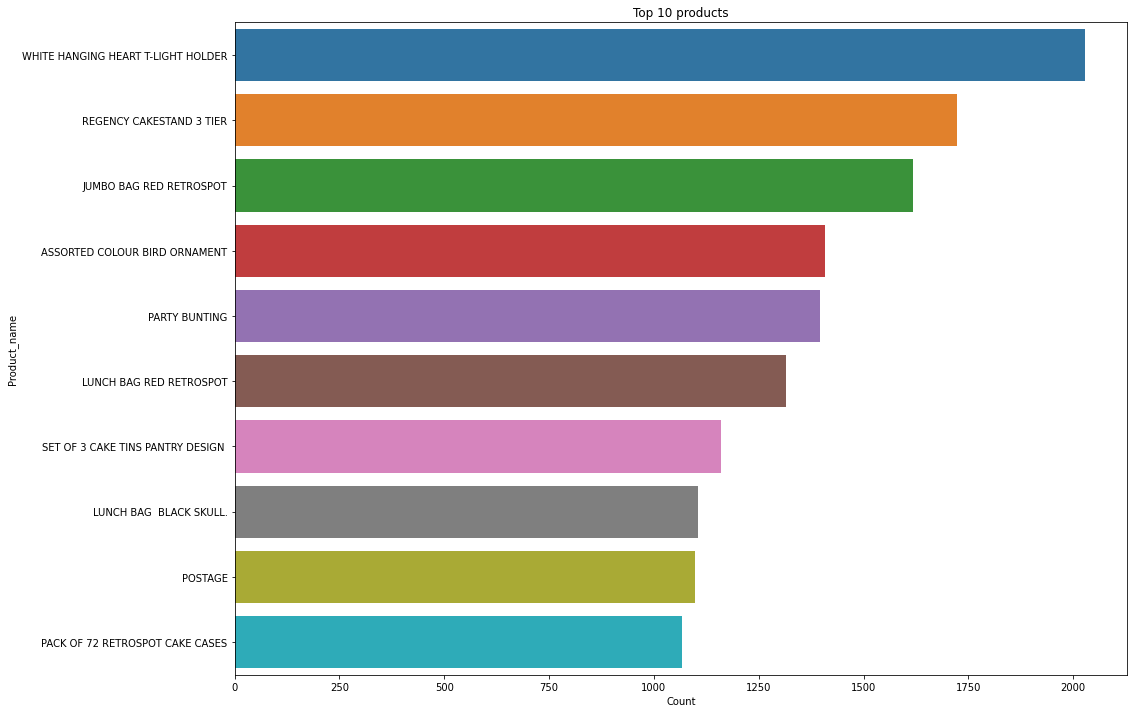

In [31]:
# top 10 product in terms of description
plt.figure(figsize=(16,12))
sns.barplot(x=top_10_product['Count'],y=top_10_product['Product_name'])
plt.title('Top 10 products')
plt.show()


* # WHITE HANGING HEART T-LIGHT HOLDER	is the highest selling product almost 2018 units were sold.
* # REGENCY CAKE STAND 3 TIER is the 2nd highest selling product almost 1723 units were sold.

#Finding 10 items which rarly sold.

In [32]:
bottom_10_product = retail_df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_product

Product_name  Count
3867  BLUE FELT HANGING HEART WITH FLOWER      1
3868           GLASS CAKE COVER AND PLATE      1
3869           CRACKED GLAZE EARRINGS RED      1
3870              SCALLOP SHELL SOAP DISH      1
3871     NECKLACE+BRACELET SET PINK DAISY      1
3872          RUBY GLASS CLUSTER EARRINGS      1
3873       PINK CHRYSANTHEMUMS ART FLOWER      1
3874      72 CAKE CASES VINTAGE CHRISTMAS      1
3875         WALL ART , THE MAGIC FOREST       1
3876          PAPER CRAFT , LITTLE BIRDIE      1

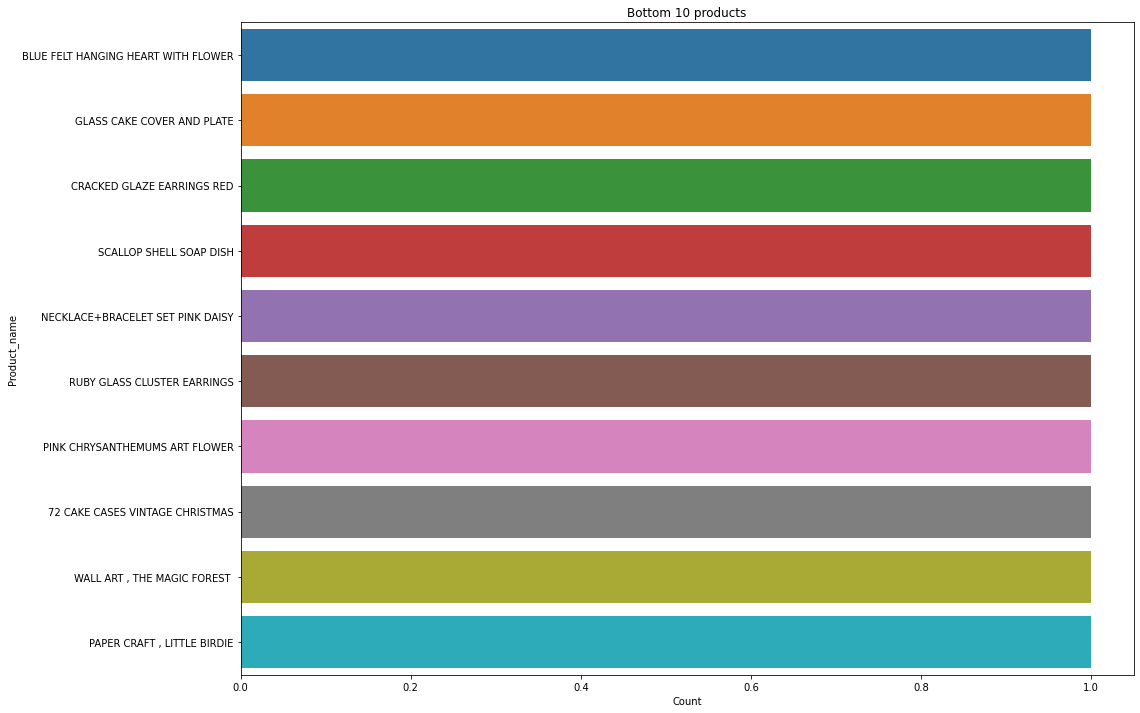

In [33]:
# bottom 10 product in terms of description
plt.figure(figsize=(16,12))
sns.barplot(x=bottom_10_product['Count'],y=bottom_10_product['Product_name'])
plt.title('Bottom 10 products')
plt.show()

#These are the top 10 rarely sold product which has sold count 1.

#Knowing top 10 items in terms of StockCode.

In [34]:
#using value_count function we are able to get the total count for each stockcode.
top_10_StockCodes = retail_df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

StockCode  Count
0    85123A   2035
1     22423   1723
2    85099B   1618
3     84879   1408
4     47566   1396
5     20725   1317
6     22720   1159
7     20727   1105
8      POST   1099
9     23203   1098

#With the help of seaborn library we are able to visualize.

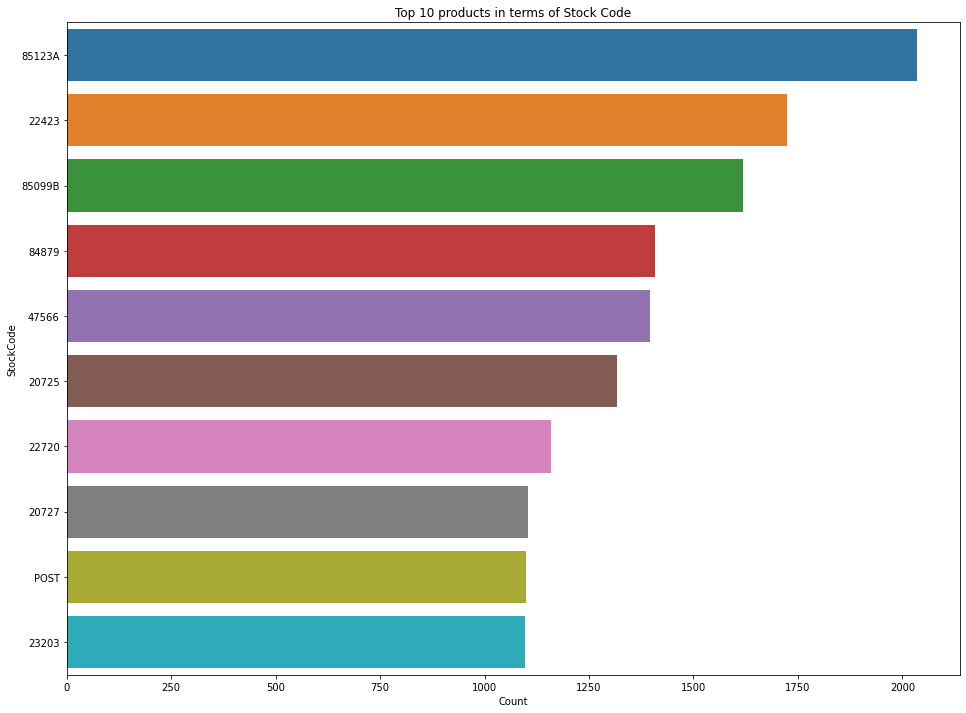

In [35]:
# top 10 product in terms of StcokCode
plt.figure(figsize=(16,12))
sns.barplot(x=top_10_StockCodes['Count'],y=top_10_StockCodes['StockCode'])
plt.title('Top 10 products in terms of Stock Code')
plt.show()

* # StockCode-85123A is the first highest selling product.
* # StockCode-22423 is the 2nd highest selling product.

In [36]:
top_10_customers = retail_df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_purchasing_Count'}).head(10)
top_10_customers

CustomerID  Products_purchasing_Count
0     17841.0                       7847
1     14911.0                       5675
2     14096.0                       5111
3     12748.0                       4595
4     14606.0                       2700
5     15311.0                       2379
6     14646.0                       2076
7     13089.0                       1818
8     13263.0                       1677
9     14298.0                       1637

Text(0.5, 1.0, 'Top 10 frequent Customers.')

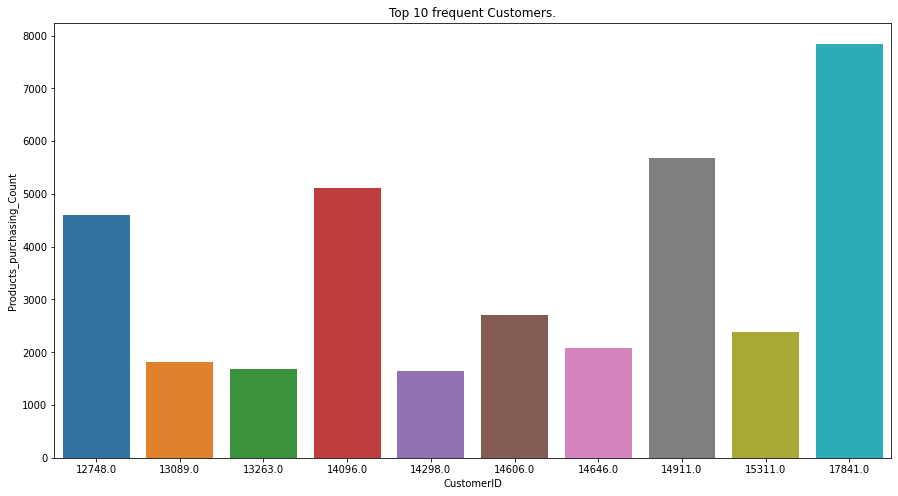

In [37]:
# Top 10 frequent Customers
plt.figure(figsize=(15,8))
sns.barplot(x=top_10_customers['CustomerID'],y=top_10_customers['Products_purchasing_Count'].head(10))
plt.title('Top 10 frequent Customers.')

# From the above chart Following are the Observation:-
* # CustomerID- 17841 had purchased highest number of products.
* # CustomerID-14911 is the 2nd higest customer who purchased the most the products.


# Now checking the which country has heighest number of customers.

In [38]:
#getting the country which has highest number of customers
top_5_countries = retail_df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'})
top_5_countries.head(10)

Country  Customer_count
0  United Kingdom          354321
1         Germany            9040
2          France            8341
3            EIRE            7236
4           Spain            2484
5     Netherlands            2359
6         Belgium            2031
7     Switzerland            1841
8        Portugal            1462
9       Australia            1182

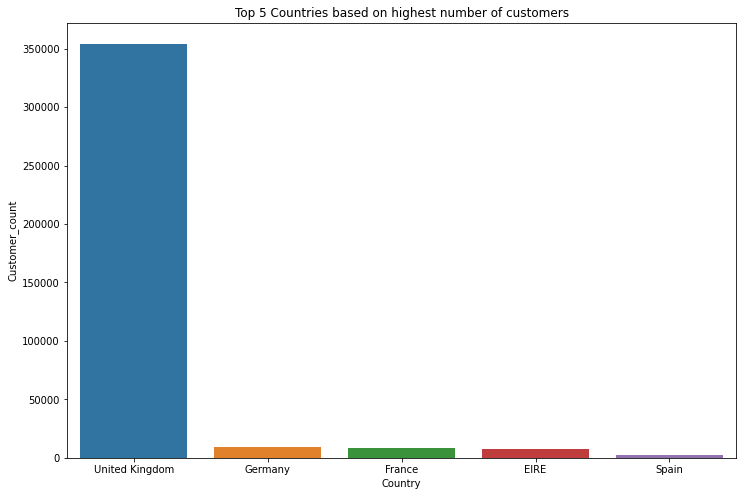

In [39]:
# top 5 countries where max sell happens.
plt.figure(figsize=(12,8))
sns.barplot(x=top_5_countries['Country'].head(5),y=top_5_countries['Customer_count'].head(5))
plt.title('Top 5 Countries based on highest number of customers')
plt.show()

# From the above chart Following are the Observation:-
* # UK has highest number of customers.
* # Germany,France and IreLand has almost equal number of customers.

#Knowing the country where less sell happens or less number of customers.

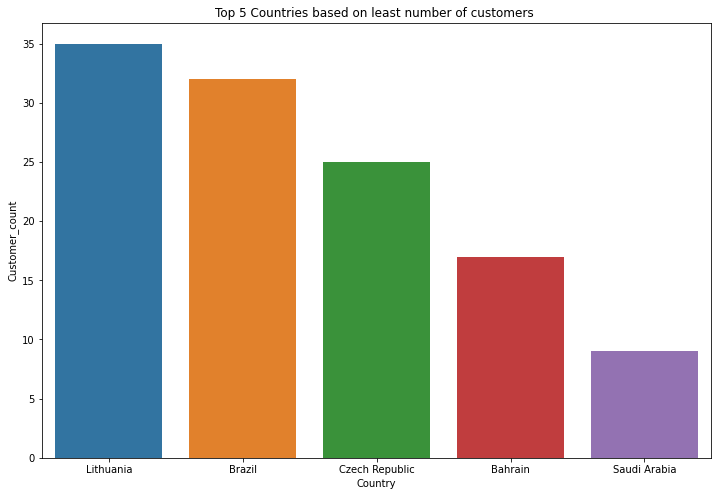

In [40]:
# top 5 countries where min sell happens.
plt.figure(figsize=(12,8))
sns.barplot(x=top_5_countries['Country'].tail(5),y=top_5_countries['Customer_count'].tail(5))
plt.title('Top 5 Countries based on least number of customers ')
plt.show()

# From the above chart Following are the Observation:-
* # There are very less customers from Saudi Arabia.
* # Bahrain is the 2nd Country having least number of customers.

#Checking the sales according to month. 

In [41]:
#Sales according to month 
sales_in_month = retail_df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'Sales_count'})
sales_in_month

Month  Sales_count
0    November        64531
1     October        49554
2    December        43461
3   September        40028
4         May        28320
5        June        27185
6       March        27175
7      August        27007
8        July        26825
9       April        22642
10    January        21229
11   February        19927

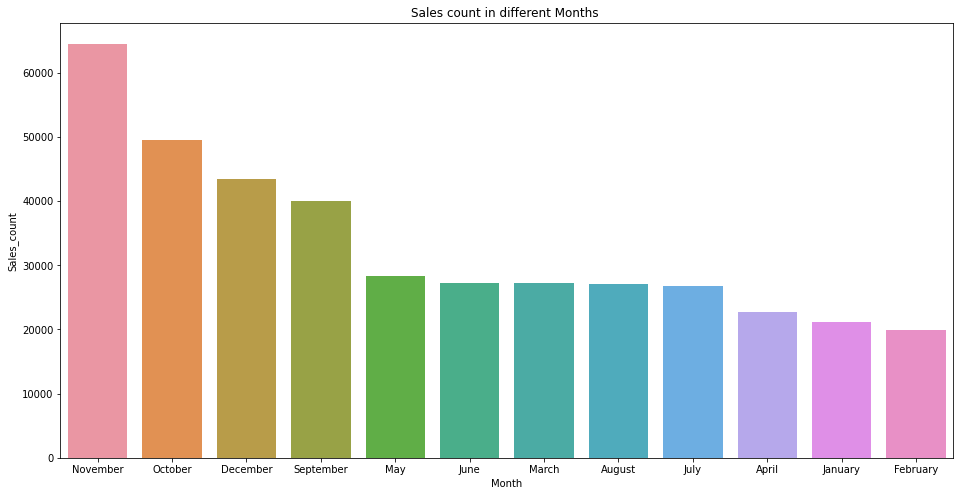

In [42]:
# Sales count in different months.
plt.figure(figsize=(16,8))
sns.barplot(x=sales_in_month['Month'],y=sales_in_month['Sales_count'])
plt.title('Sales count in different Months ')
plt.show()

#From the above chart Following are the Observation:-
* # Most of the sale happened in Novmenber month.
* # February Month had least sales.

#Now Checking the sales according to day.

In [43]:
#Sales according to day
sales_on_day_basis = retail_df['Day'].value_counts().reset_index().rename(columns={'index':'Day',"Day":'Sale_count'})
sales_on_day_basis

Day  Sale_count
0   Thursday       80035
1  Wednesday       68885
2    Tuesday       66473
3     Monday       64893
4     Sunday       62773
5     Friday       54825

Text(0.5, 1.0, 'Sales count on different Days ')

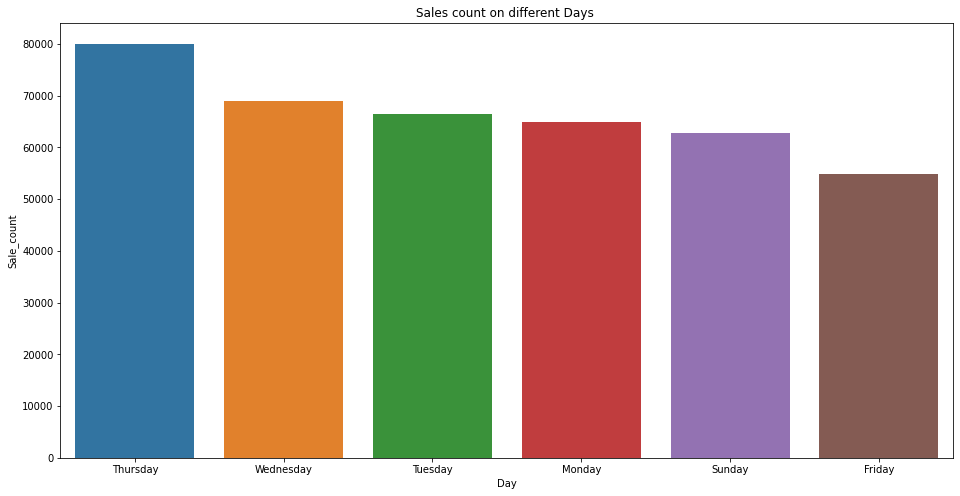

In [44]:
# Sales count on different days.
plt.figure(figsize=(16,8))
sns.barplot(x=sales_on_day_basis['Day'],y=sales_on_day_basis['Sale_count'])
plt.title('Sales count on different Days ')

# From the above chart Following are the Observation:-
* # Sales On Thursdays are very high.
* # Sales On Fridays are very less.

#Now checking at what time maximum sales happen or rush time.

In [45]:
sales_timing = retail_df['Day_time_type'].value_counts().reset_index().rename(columns={'index':'Day_time_type','Day_time_type':'Sales_count'})
sales_timing

Day_time_type  Sales_count
0     Afternoon       272738
1       Morning       118095
2       Evening         7051

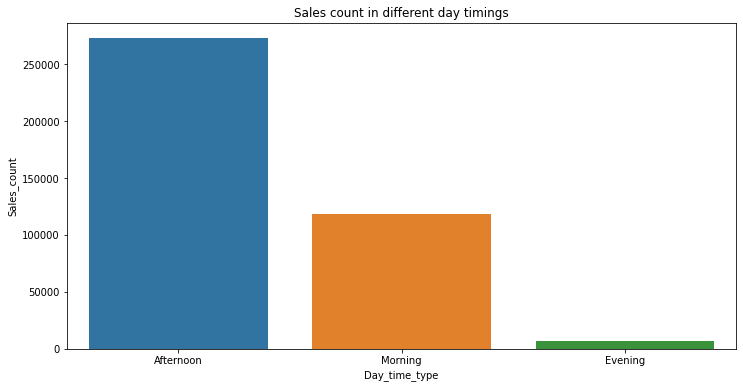

In [46]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=sales_timing['Day_time_type'],y=sales_timing['Sales_count'])
plt.title('Sales count in different day timings')
plt.show()

# From the above chart Following are the Observation:-

* # Most of the sales happens in the afternoon.
* # Least sales happens in the evening.

#Knowing the average amount spend by an customer.

In [47]:
avg_amount = retail_df.groupby('CustomerID')['TotalAmount'].mean().reset_index().rename(columns={'TotalAmount':'Avg_amount_per_customer'}).sort_values('Avg_amount_per_customer',ascending=False)
avg_amount

CustomerID  Avg_amount_per_customer
0        12346.0             77183.600000
3008     16446.0             56157.500000
2011     15098.0             13305.500000
2502     15749.0              4453.430000
2087     15195.0              3861.000000
...          ...                      ...
3590     17254.0                 2.432500
697      13271.0                 2.264375
990      13684.0                 2.241000
3995     17816.0                 2.150588
2315     15503.0                 2.101286

[4338 rows x 2 columns]

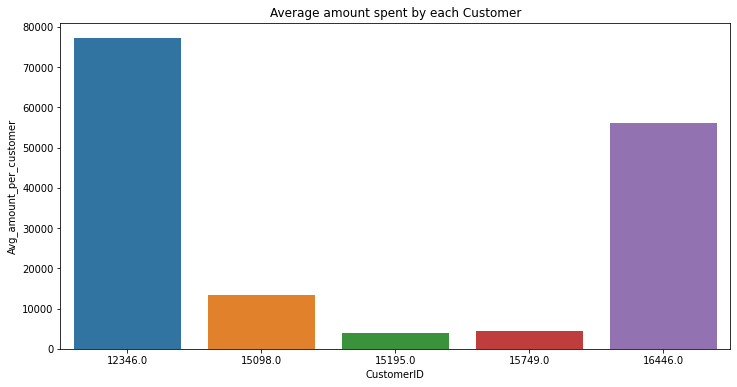

In [48]:
# Sales count on different days.
plt.figure(figsize=(12,6))
sns.barplot(x=avg_amount['CustomerID'].head(5),y=avg_amount['Avg_amount_per_customer'].head(15))
plt.title('Average amount spent by each Customer')
plt.show()

#From the above chart Following are the Observation:-
* # 77183 (Dollars)is the highest average amount spent by the CustomerID-12346.
* # 56157 (Dollars) is the 2nd  highest average amount spent by the CustomerID-16446.

In [49]:
final_retail_df = retail_df.copy()

#Anomaly Detection

## Isolation Forest

Isolation Forest is an algorithm to detect outliers that returns the anomaly score of each sample using the IsolationForest algorithm which is based on the fact that anomalies are data points that are few and different. Isolation Forest is a tree-based model. In these trees, partitions are created by first randomly selecting a feature and then selecting a random split value between the minimum and maximum value of the selected feature.

The following process shows how IsolationForest behaves in the case of the Susperstore’s sales, and the algorithm is implemented in Sklearn:

* Trained IsolationForest using the Sales data.
* Store the Sales in the NumPy array for using in our models later.
* Computed the anomaly score for each observation. The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.
* Classified each observation as an outlier or non-outlier.
* The visualization highlights the regions where the outliers fall.

In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

#Univariate Anomaly Detection on Quantity

In [51]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(final_retail_df['Quantity'].values.reshape(-1, 1))
final_retail_df['anomaly_score_univariate_Quantity'] = isolation_forest.decision_function(final_retail_df['Quantity'].values.reshape(-1, 1))
final_retail_df['outlier_univariate_Quantity'] = isolation_forest.predict(final_retail_df['Quantity'].values.reshape(-1, 1))

#Univariate Anomaly Detection on UnitPrice





In [52]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(final_retail_df['UnitPrice'].values.reshape(-1, 1))
final_retail_df['anomaly_score_univariate_UnitPrice'] = isolation_forest.decision_function(final_retail_df['UnitPrice'].values.reshape(-1, 1))
final_retail_df['outlier_univariate_UnitPrice'] = isolation_forest.predict(final_retail_df['UnitPrice'].values.reshape(-1, 1))

#Multivariate Anomaly Detection

In [53]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(final_retail_df[['Quantity','UnitPrice']])

In [54]:

clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(X)

# predict raw anomaly score
final_retail_df['multivariate_anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
final_retail_df['multivariate_outlier'] = clf.predict(X)

In [55]:
final_retail_df[final_retail_df['multivariate_outlier']==-1]

InvoiceNo StockCode                          Description  Quantity  \
178       536387     79321                        CHILLI LIGHTS       192   
179       536387     22780       LIGHT GARLAND BUTTERFILES PINK       192   
180       536387     22779           WOODEN OWLS LIGHT GARLAND        192   
181       536387     22466        FAIRY TALE COTTAGE NIGHTLIGHT       432   
182       536387     21731        RED TOADSTOOL LED NIGHT LIGHT       432   
...          ...       ...                                  ...       ...   
540314    581476     22693   GROW A FLYTRAP OR SUNFLOWER IN TIN       192   
540342    581476     16008  SMALL FOLDING SCISSOR(POINTED EDGE)       240   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
541545    581501     22319    HAIRCLIPS FORTIES FABRIC ASSORTED       180   
541702    581566     23404           HOME SWEET HOME BLACKBOARD       144   

               InvoiceDate  UnitPrice  CustomerID         Country  year  \
178    2010-12-01 09:58:00       3.82     16029.0  United Kingdom  2010   
179    2010-12-01 09:58:00       3.37     16029.0  United Kingdom  2010   
180    2010-12-01 09:58:00       3.37     16029.0  United Kingdom  2010   
181    2010-12-01 09:58:00       1.45     16029.0  United Kingdom  2010   
182    2010-12-01 09:58:00       1.25     16029.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
540314 2011-12-09 08:48:00       1.06     12433.0          Norway  2011   
540342 2011-12-09 08:48:00       0.12     12433.0          Norway  2011   
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom  2011   
541545 2011-12-09 10:46:00       0.19     12985.0  United Kingdom  2011   
541702 2011-12-09 11:50:00       3.26     18102.0  United Kingdom  2011   

        month_num  day_num  hour  minute     Month        Day  TotalAmount  \
178            12        1     9      58  December  Wednesday       733.44   
179            12        1     9      58  December  Wednesday       647.04   
180            12        1     9      58  December  Wednesday       647.04   
181            12        1     9      58  December  Wednesday       626.40   
182            12        1     9      58  December  Wednesday       540.00   
...           ...      ...   ...     ...       ...        ...          ...   
540314         12        9     8      48  December     Friday       203.52   
540342         12        9     8      48  December     Friday        28.80   
540421         12        9     9      15  December     Friday    168469.60   
541545         12        9    10      46  December     Friday        34.20   
541702         12        9    11      50  December     Friday       469.44   

       Day_time_type  anomaly_score_univariate_Quantity  \
178          Morning                          -0.060985   
179          Morning                          -0.060985   
180          Morning                          -0.060985   
181          Morning                          -0.101734   
182          Morning                          -0.101734   
...              ...                                ...   
540314       Morning                          -0.060985   
540342       Morning                          -0.078287   
540421       Morning                          -0.116944   
541545       Morning                          -0.055480   
541702       Morning                          -0.026670   

        outlier_univariate_Quantity  anomaly_score_univariate_UnitPrice  \
178                              -1                            0.250632   
179                              -1                            0.191644   
180                              -1                            0.191644   
181                              -1                            0.278544   
182                              -1                            0.330108   
...                             ...                                 ...   
540314    

In [56]:
Anomaly_df = final_retail_df[(final_retail_df['outlier_univariate_Quantity'] == 1) & (final_retail_df['outlier_univariate_UnitPrice'] == 1) & (final_retail_df['multivariate_outlier'] == -1)]
Anomaly_df

InvoiceNo StockCode                       Description  Quantity  \
6607      536970     22423          REGENCY CAKESTAND 3 TIER       120   
14784     537618     22423          REGENCY CAKESTAND 3 TIER        80   
31603     538998     22423          REGENCY CAKESTAND 3 TIER        80   
58122     541220     22838     3 TIER CAKE TIN RED AND CREAM        96   
89826     543976     22423          REGENCY CAKESTAND 3 TIER        72   
106278    545320     22838     3 TIER CAKE TIN RED AND CREAM        96   
108007    545475     21217     RED RETROSPOT ROUND CAKE TINS       120   
116109    546213     23007            SPACEBOY BABY GIFT SET        36   
116110    546213     23008          DOLLY GIRL BABY GIFT SET        36   
116111    546213     23010       CIRCUS PARADE BABY GIFT SET        36   
154579    549927     22423          REGENCY CAKESTAND 3 TIER        60   
176906    552038     22838     3 TIER CAKE TIN RED AND CREAM        48   
186918    552888     22423          REGENCY CAKESTAND 3 TIER       120   
198380    554037     22838     3 TIER CAKE TIN RED AND CREAM        28   
212529    555490     22423          REGENCY CAKESTAND 3 TIER       120   
217183    555920     22783  SET 3 WICKER OVAL BASKETS W LIDS        74   
263180    559941     22423          REGENCY CAKESTAND 3 TIER       112   
274158    560887     22847       BREAD BIN DINER STYLE IVORY        32   
274556    560925     22423          REGENCY CAKESTAND 3 TIER        72   
304872    563614     22946      WOODEN ADVENT CALENDAR CREAM        60   
304957    563614     23314      VINTAGE CHRISTMAS TABLECLOTH       100   
323065    565240     22941      CHRISTMAS LIGHTS 10 REINDEER       120   
373659    569340     21115             ROSE CARAVAN DOORSTOP       120   
373670    569343     23536             VILLAGE SHOW WALL ART       120   
373672    569343     23541        WALL ART CLASSIC PUDDINGS        120   
373675    569343     23540        WALL ART THE MAGIC FOREST        120   
377922    569570     22423          REGENCY CAKESTAND 3 TIER       120   
378279    569640     22423          REGENCY CAKESTAND 3 TIER        80   
411200    572196     23541        WALL ART CLASSIC PUDDINGS        120   
437183    574271     23064            CINDERELLA CHANDELIER        100   
437489    574295     85066       CREAM SWEETHEART MINI CHEST        96   
439190    574363     23541        WALL ART CLASSIC PUDDINGS        120   
440488    574534     22423          REGENCY CAKESTAND 3 TIER        72   
471858    576653     22838     3 TIER CAKE TIN RED AND CREAM        48   
479544    577168     22423          REGENCY CAKESTAND 3 TIER        56   
508937    579284     22423          REGENCY CAKESTAND 3 TIER        80   
540063    581457     23553       LANDMARK FRAME CAMDEN TOWN        120   
540064    581457     23542           WALL ART 70'S ALPHABET        120   

               InvoiceDate  UnitPrice  CustomerID         Country  year  \
6607   2010-12-03 13:12:00      10.95     17949.0  United Kingdom  2010   
14784  2010-12-07 13:50:00      10.95     15061.0  United Kingdom  2010   
31603  2010-12-15 12:08:00      10.95     15061.0  United Kingdom  2010   
58122  2011-01-14 14:11:00      12.75     14156.0            EIRE  2011   
89826  2011-02-14 15:26:00      10.95     13089.0  United Kingdom  2011   
106278 2011-03-01 14:47:00      12.75     14156.0            EIRE  2011   
108007 2011-03-03 10:59:00       8.95     12415.0       Australia  2011   
116109 2011-03-10 11:37:00      14.95     14156.0            EIRE  2011   
116110 2011-03-10 11:37:00      14.95     14156.0            EIRE  2011   
116111 2011-03-10 11:37:00      14.95     14156.0            EIRE  2011   
154579 2011-04-13 10:19:00      10.95     16684.0  United Kingdom  2011   
176906 2011-05-06 08:08:00      12.75     14156.0            EIRE  2011   
186918 2011-05-12 10:23:00      10.95     15061.0  United Kingdom  2011   
198380 2011-05-20 14:13:00      14.95     12415.0       Australia  201

#Checking the shape of our anomaly detected dataset

In [57]:
Anomaly_df.shape

(38, 23)

#We found 38 observation which detected as anomary so we simply remove these observation from our main dataset because these anomaly effect our final goal.

In [58]:
final_retail_df = final_retail_df[(final_retail_df['outlier_univariate_Quantity'] == 1) & (final_retail_df['outlier_univariate_UnitPrice'] == 1) & (final_retail_df['multivariate_outlier'] == 1)]

In [59]:
final_retail_df.shape

(390222, 23)

#So finally we have 390225 observation and 23 features. 

#     ---------------------------------------------------------------**Model Building**------------------------------------------------------

# **RFM Model Analysis:**

#**What is RFM?**

* ***RFM is a method used to analyze customer value. RFM stands for RECENCY, Frequency, and Monetary.***

* ***RECENCY: How recently did the customer visit our website or how recently did a customer purchase?***

* ***Frequency: How often do they visit or how often do they purchase?***

* ***Monetary: How much revenue we get from their visit or how much do they spend when they purchase?***

# **Why it is Needed?**
***RFM Analysis is a marketing framework that is used to understand and analyze customer behaviour based on the above three factors RECENCY, Frequency, and Monetary.***

***The RFM Analysis will help the businesses to segment their customer base into different homogenous groups so that they can engage with each group with different targeted marketing strategies.***

In [60]:
#Making a copy for our rmf model
rfm_dataframe = final_retail_df.copy()

In [61]:
rfm_dataframe.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  year  month_num  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010         12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010         12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010         12   

   day_num  hour  minute     Month        Day  TotalAmount Day_time_type  \
0        1     8      26  December  Wednesday        15.30       Morning   
1        1     8      26  December  Wednesday        20.34       Morning   
2        1     8      26  December  Wednesday        22.00       Morning   
3        1     8      26  December  Wednesday        20.34       Morning   
4        1     8      26  December  Wednesday        20.34       Morning   

   anomaly_score_univariate_Quantity  outlier_univariate_Quantity  \
0                           0.345160                            1   
1                           0.345160                            1   
2                           0.285694                            1   
3                           0.345160                            1   
4                           0.345160                            1   

   anomaly_score_univariate_UnitPrice  outlier_univariate_UnitPrice  \
0                            0.260634                             1   
1                            0.193865                             1   
2                            0.246100                             1   
3                            0.193865                             1   
4                            0.193865                             1   

   multivariate_anomaly_score  multivariate_outlier  
0                    0.328324                     1  
1                    0.317353                     1  
2                    0.304376                     1  
3                    0.317353                     1  
4                    0.317353                     1

In [62]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_dataframe = retail_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_dataframe['InvoiceDate'] = rfm_dataframe['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_dataframe.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12346.0      325          1  77183.60
1     12347.0        2        182   4310.00
2     12348.0       75         31   1797.24
3     12349.0       18         73   1757.55
4     12350.0      310         17    334.40

In [63]:
# Descriptive Stats= Recency
rfm_dataframe.describe()

Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.059474    91.720609    2054.266460
std     100.012264   228.785094    8989.230441
min       0.000000     1.000000       3.750000
25%      17.000000    17.000000     307.415000
50%      50.000000    41.000000     674.485000
75%     141.750000   100.000000    1661.740000
max     373.000000  7847.000000  280206.020000

#Now checking the distribution of our RMF

Text(0.5, 1.0, 'Distribution of Recency')

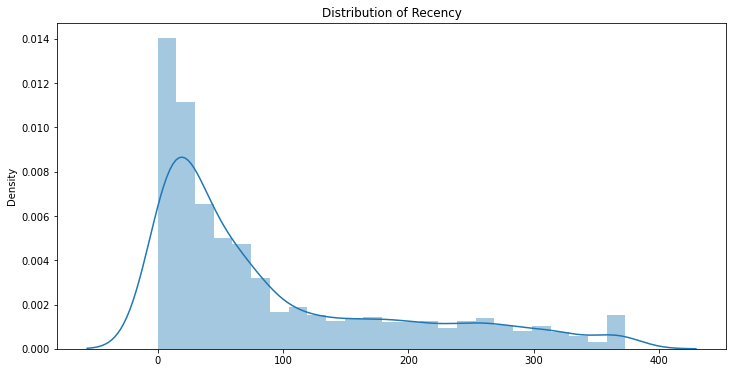

In [64]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Recency'])
plt.title('Distribution of Recency')

#Distribution of Recency is right skewed.

Text(0.5, 1.0, 'Distribution of Frequency')

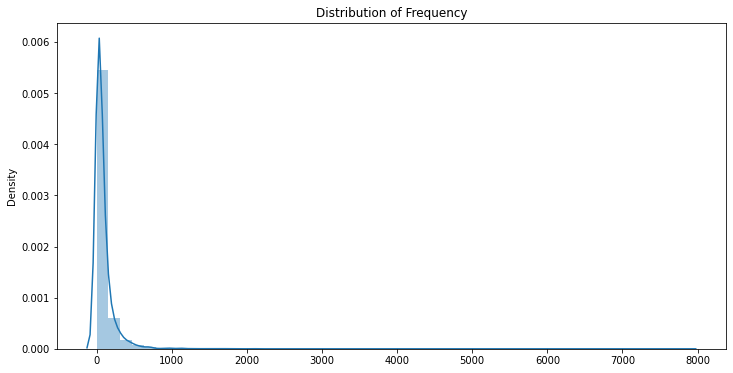

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Frequency'])
plt.title('Distribution of Frequency')

#Distribution of Frequency is highly right skewed.

Text(0.5, 1.0, 'Distribution of Monetary')

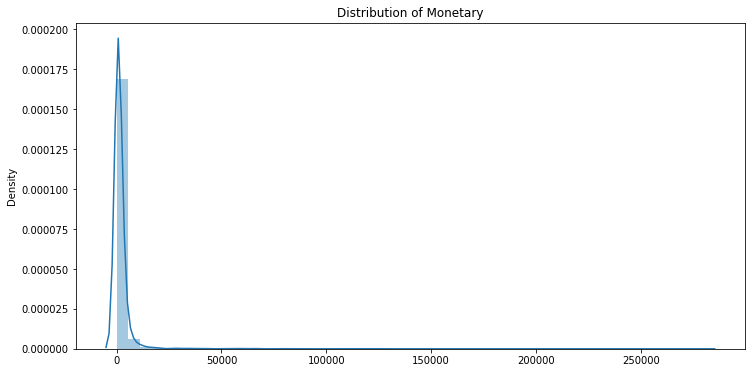

In [66]:
plt.figure(figsize=(12,6))
sns.distplot(x=rfm_dataframe['Monetary'])
plt.title('Distribution of Monetary')

#Distribution of Monetary is highly right skewed.

In [67]:
# Split the data into four segment using Quantile
quantile = rfm_dataframe.quantile(q = [0.25,0.50,0.75])

In [68]:
quantile = quantile.to_dict()

In [69]:
quantile

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75}}

#So we need to set an score for recency, frequency and monetary according to the quartiles  

In [70]:
 #Converting quantiles to a dictionary, easier to use.
#quantiles = quantiles.to_dict()
#Functions to create R, F and M segments
# arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
# lower the recency, good for the company



def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1                               
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

        # arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
        # higher value of frequency and monetary lead to a good consumer. Here higher value = 1 in reverse way.
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [71]:
# Calculating and adding R,F and M segments values columns in the existing dataset to show R,F,M segment values
rfm_dataframe["R"] = rfm_dataframe['Recency'].apply(RScoring,args=('Recency',quantile,))
rfm_dataframe["F"] = rfm_dataframe['Frequency'].apply(FnMScoring,args=('Frequency',quantile,))
rfm_dataframe["M"] = rfm_dataframe['Monetary'].apply(FnMScoring,args=('Monetary',quantile,))
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12346.0         325          1  77183.60  4  4  1
12347.0           2        182   4310.00  1  1  1
12348.0          75         31   1797.24  3  3  1
12349.0          18         73   1757.55  2  2  1
12350.0         310         17    334.40  4  4  3

In [72]:
# Add a new column to combine RFM score
rfm_dataframe['RFM_Group'] = rfm_dataframe.R.map(str)+rfm_dataframe.F.map(str)+rfm_dataframe.M.map(str)

In [73]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_dataframe['RFM_Score'] = rfm_dataframe[['R', 'F', 'M']].sum(axis = 1)
rfm_dataframe.head()

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score
CustomerID                                                            
12346.0         325          1  77183.60  4  4  1       441          9
12347.0           2        182   4310.00  1  1  1       111          3
12348.0          75         31   1797.24  3  3  1       331          7
12349.0          18         73   1757.55  2  2  1       221          5
12350.0         310         17    334.40  4  4  3       443         11

In [74]:
rfm_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFM_Group  4338 non-null   object 
 7   RFM_Score  4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [75]:
rfm_dataframe['RFM_Score'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

#Assigning the loyalty level to each customer 
* # Platinaum for most frequent customer.
* # Gold for frequent customer.
* # Silver for less frequent customer.
* # Bronz for very less frequent customer.

In [76]:
# Assign Loyelty Level to each customer
Loyalty_Level = ['Platinaum','Gold','Silver','Bronz']

Score_cut = pd.qcut(rfm_dataframe['RFM_Score'],q = 4,labels=Loyalty_Level)
rfm_dataframe['RFM_Loyalty_Level'] = Score_cut.values
rfm_dataframe.reset_index().head()

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
0     12346.0      325          1  77183.60  4  4  1       441          9   
1     12347.0        2        182   4310.00  1  1  1       111          3   
2     12348.0       75         31   1797.24  3  3  1       331          7   
3     12349.0       18         73   1757.55  2  2  1       221          5   
4     12350.0      310         17    334.40  4  4  3       443         11   

  RFM_Loyalty_Level  
0            Silver  
1         Platinaum  
2              Gold  
3         Platinaum  
4             Bronz

In [77]:
# Validate the data For RFM group = 111
rfm_dataframe[rfm_dataframe['RFM_Group'] == '111'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     14156.0        9       1400  117379.63  1  1  1       111          3   
5     17511.0        2        963   91062.38  1  1  1       111          3   
6     16684.0        4        277   66653.56  1  1  1       111          3   
7     14096.0        4       5111   65164.79  1  1  1       111          3   
8     13694.0        3        568   65039.62  1  1  1       111          3   
9     15311.0        0       2379   60767.90  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

#With the help of seaborn library we visualize the RFM_loyalty_level.

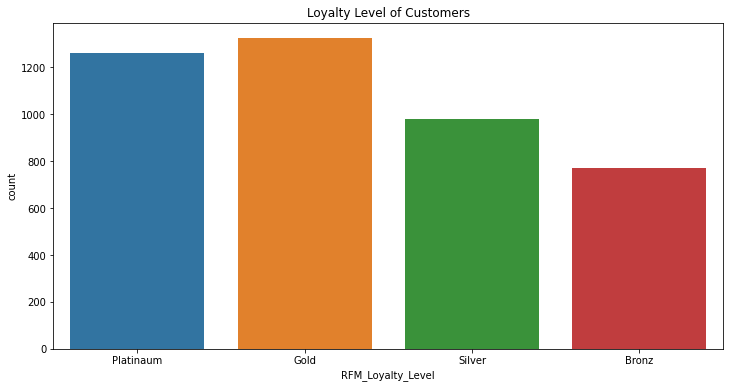

In [78]:
# Plot the loyelty level
plt.figure(figsize=(12,6))
sns.countplot(rfm_dataframe['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

#Getting the most frequent customer who has loyalty level Platinaum.

In [79]:
#Folowing table contains our target peoples
rfm_dataframe[rfm_dataframe['RFM_Loyalty_Level'] == 'Platinaum'].sort_values("Monetary",ascending = False).reset_index().head(10)

CustomerID  Recency  Frequency   Monetary  R  F  M RFM_Group  RFM_Score  \
0     14646.0        1       2076  280206.02  1  1  1       111          3   
1     18102.0        0        431  259657.30  1  1  1       111          3   
2     17450.0        8        337  194550.79  1  1  1       111          3   
3     14911.0        1       5675  143825.06  1  1  1       111          3   
4     12415.0       24        714  124914.53  2  1  1       211          4   
5     14156.0        9       1400  117379.63  1  1  1       111          3   
6     17511.0        2        963   91062.38  1  1  1       111          3   
7     16029.0       38        242   81024.84  2  1  1       211          4   
8     16684.0        4        277   66653.56  1  1  1       111          3   
9     14096.0        4       5111   65164.79  1  1  1       111          3   

  RFM_Loyalty_Level  
0         Platinaum  
1         Platinaum  
2         Platinaum  
3         Platinaum  
4         Platinaum  
5         Platinaum  
6         Platinaum  
7         Platinaum  
8         Platinaum  
9         Platinaum

#selecting only Recency, Frequency, Monetary and RMF_loyalty_level for clustering.

In [80]:
segmentation_based_on_RFM = rfm_dataframe[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [81]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({
    'Recency': ['mean', 'min', 'max'],
    'Frequency': ['mean', 'min', 'max'],
    'Monetary': ['mean', 'min', 'max','count']
})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinaum           19.412510   0  140  228.559778  20  7847  5255.277617   
Gold                63.376133   0  372   57.959970   1   543  1169.031202   
Silver             126.029562   1  373   24.503568   1    99   583.936944   
Bronz              217.261039  51  373   10.955844   1    41   199.159506   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinaum          360.93  280206.02  1263  
Gold               114.34  168472.50  1324  
Silver               6.90   77183.60   981  
Bronz                3.75     660.00   770

#As we can see that in recency platinaum and gold level shows min value as 0. so we have to replace them with 1.

In [82]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_dataframe['Recency'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Recency]
rfm_dataframe['Monetary'] = [handle_neg_n_zero(x) for x in rfm_dataframe.Monetary]

#Now apply log tranformation to make our distribution more look like normal distribution.

In [83]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_rfm_df = rfm_dataframe[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

#Now let's Visualize the Distribution of Recency,Frequency and Monetary.

Text(0.5, 1.0, 'Distribution of Recency')

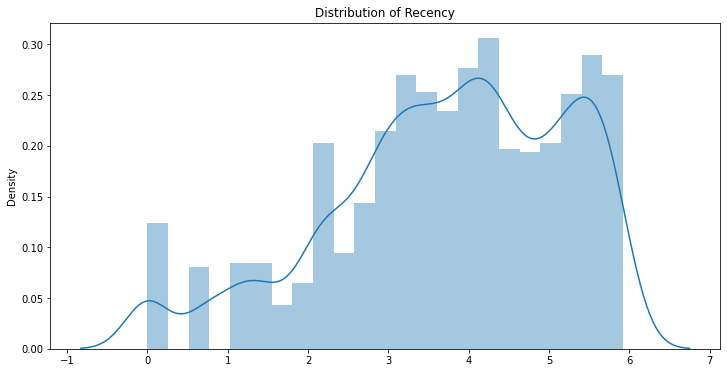

In [84]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Recency'])
plt.title('Distribution of Recency')

Text(0.5, 1.0, 'Distribution of Frequency')

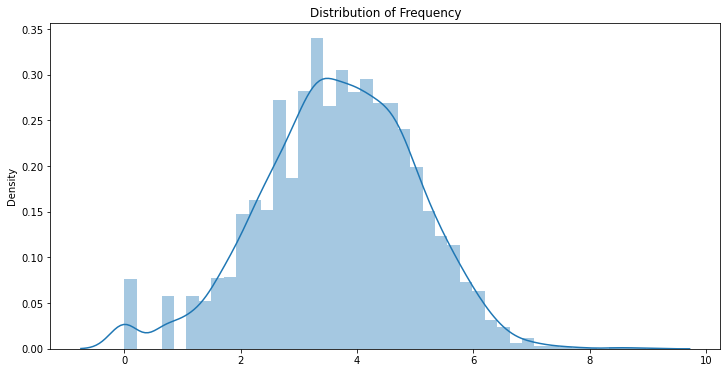

In [85]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

Text(0.5, 1.0, 'Distribution of Monetary')

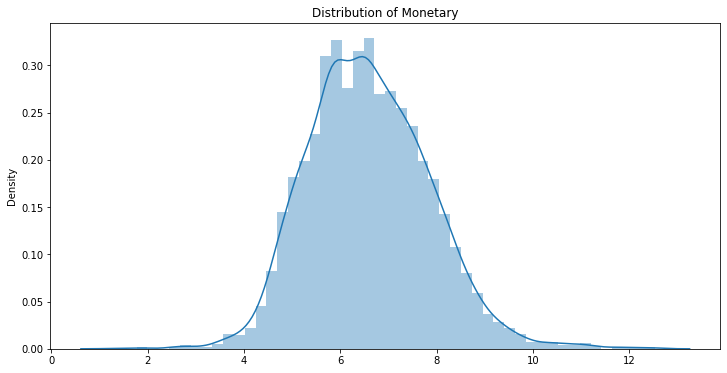

In [86]:
plt.figure(figsize=(12,6))
sns.distplot(x=Log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')

In [87]:

rfm_dataframe['Recency_log'] = rfm_dataframe['Recency'].apply(math.log)
rfm_dataframe['Frequency_log'] = rfm_dataframe['Frequency'].apply(math.log)
rfm_dataframe['Monetary_log'] = rfm_dataframe['Monetary'].apply(math.log)

In [88]:
rfm_dataframe

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277         10    180.60  4  4  4       444         12   
18281.0         180          7     80.82  4  4  4       444         12   
18282.0           7         12    178.05  1  4  4       144          9   
18283.0           3        756   2094.88  1  1  1       111          3   
18287.0          42         70   1837.28  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  
CustomerID                                                              
12346.0               Silver     5.783825       0.000000     11.253942  
12347.0            Platinaum     0.693147       5.204007      8.368693  
12348.0                 Gold     4.317488       3.433987      7.494007  
12349.0            Platinaum     2.890372       4.290459      7.471676  
12350.0                Bronz     5.736572       2.833213      5.812338  
...                      ...          ...            ...           ...  
18280.0                Bronz     5.624018       2.302585      5.196285  
18281.0                Bronz     5.192957       1.945910      4.392224  
18282.0               Silver     1.945910       2.484907      5.182064  
18283.0            Platinaum     1.098612       6.628041      7.647252  
18287.0            Platinaum     3.737670       4.248495      7.516041  

[4338 rows x 12 columns]

#**MODEL IMPLEMENTATION**

#---------------------------------***Recency and Monetary.***--------------------------

# **1) KMeans Clustering:**

In [89]:
#Importing Libraries

from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [90]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

##***A)  Applying Elbow Method on Recency and Monetary.***

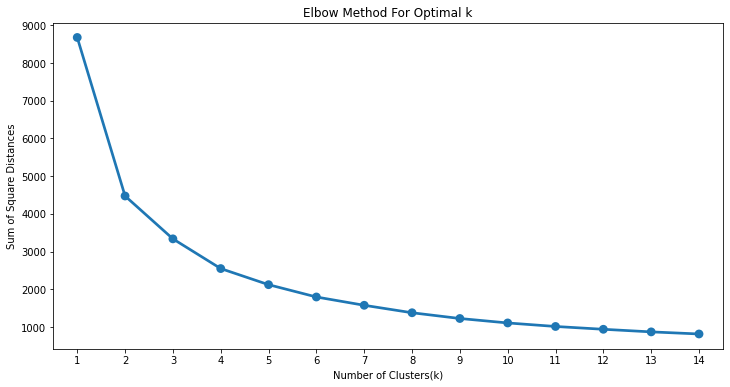

In [91]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##**Here we can see that Optimal value for cluster came out to be 2.**

# ***Cross verifying with ElbowVisualizar***
#The elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

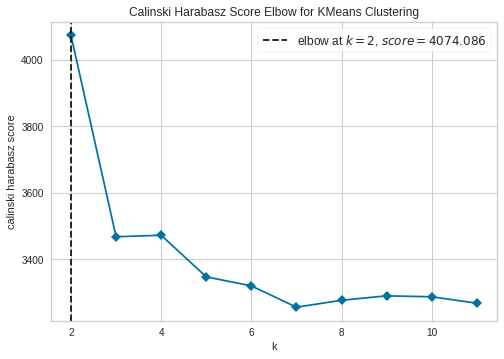

In [92]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#Elbow Visulaizer also giving cluster=2

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [93]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.421461308316105
For n_clusters = 3, silhouette score is 0.3433470120059089
For n_clusters = 4, silhouette score is 0.3649058771514865
For n_clusters = 5, silhouette score is 0.3395250404488943
For n_clusters = 6, silhouette score is 0.3422201212043055
For n_clusters = 7, silhouette score is 0.34787086356830993
For n_clusters = 8, silhouette score is 0.33774535264866695
For n_clusters = 9, silhouette score is 0.3459604789419575
For n_clusters = 10, silhouette score is 0.3479066146663346
For n_clusters = 11, silhouette score is 0.33753966718471434
For n_clusters = 12, silhouette score is 0.3427273975494072
For n_clusters = 13, silhouette score is 0.34235758342627326
For n_clusters = 14, silhouette score is 0.3376357432302628
For n_clusters = 15, silhouette score is 0.33730368894983076


#Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)

For n_clusters = 2 The average silhouette_score is : 0.421461308316105
For n_clusters = 3 The average silhouette_score is : 0.3433470120059089
For n_clusters = 4 The average silhouette_score is : 0.3649058771514865
For n_clusters = 5 The average silhouette_score is : 0.3395250404488943
For n_clusters = 6 The average silhouette_score is : 0.3422201212043055
For n_clusters = 7 The average silhouette_score is : 0.34787086356830993
For n_clusters = 8 The average silhouette_score is : 0.33774535264866695
For n_clusters = 9 The average silhouette_score is : 0.3459604789419575
For n_clusters = 10 The average silhouette_score is : 0.3479066146663346


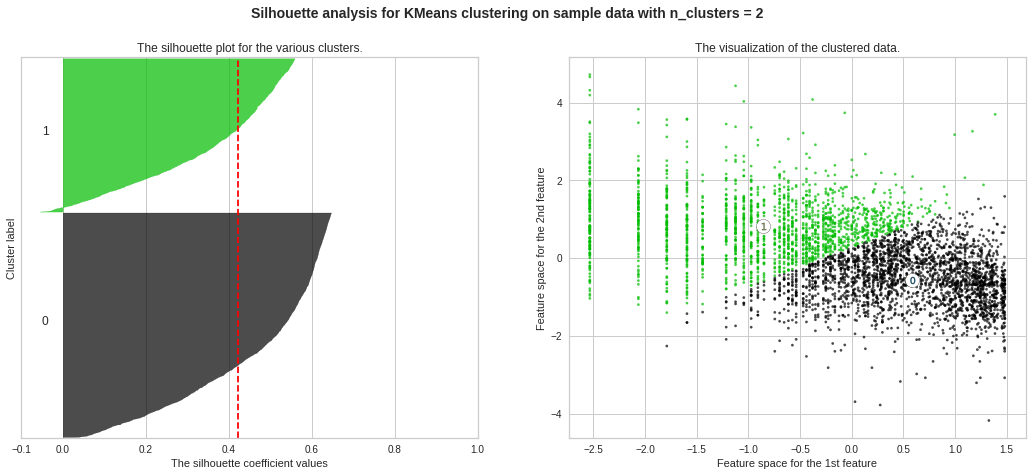

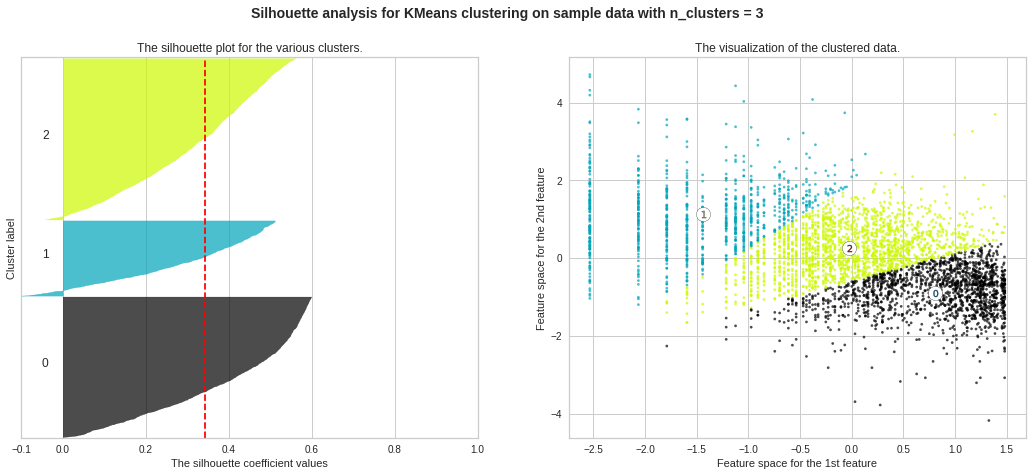

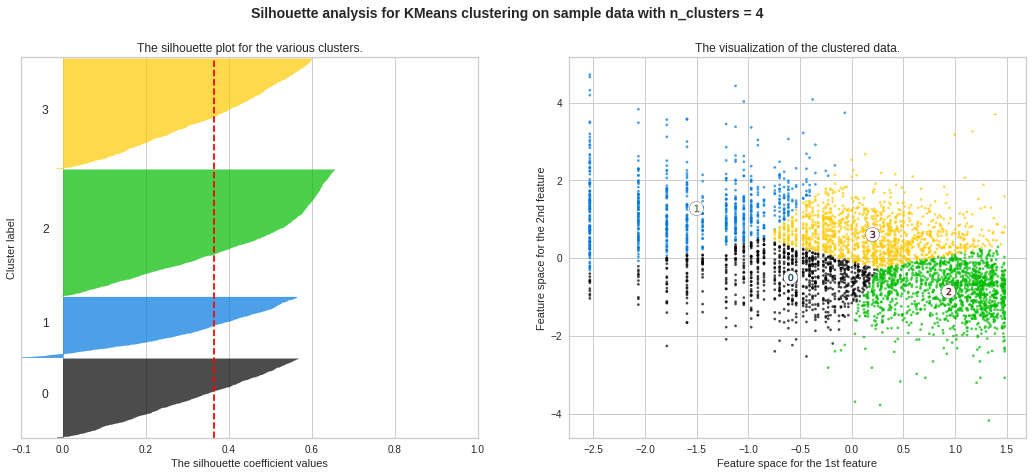

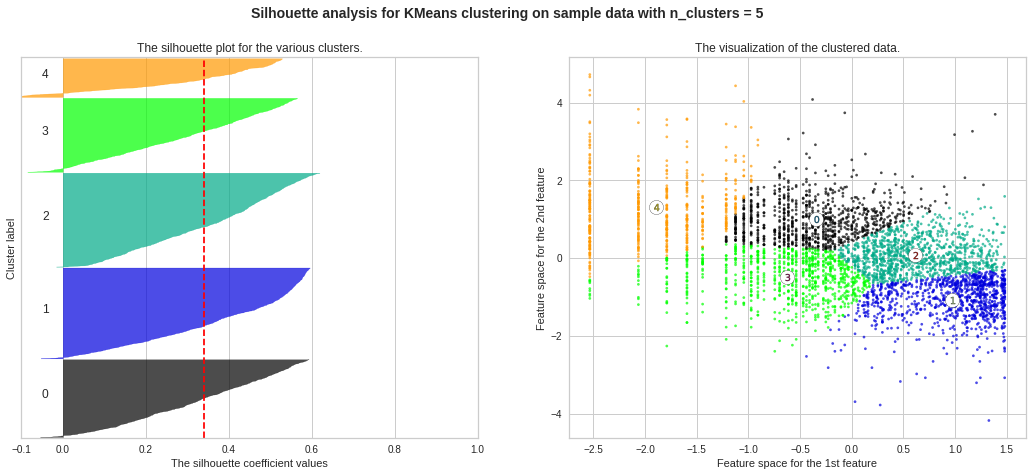

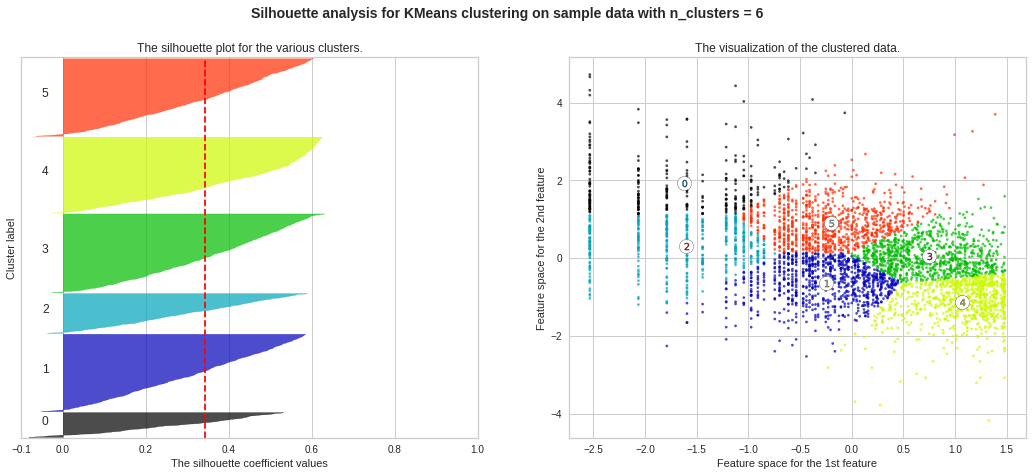

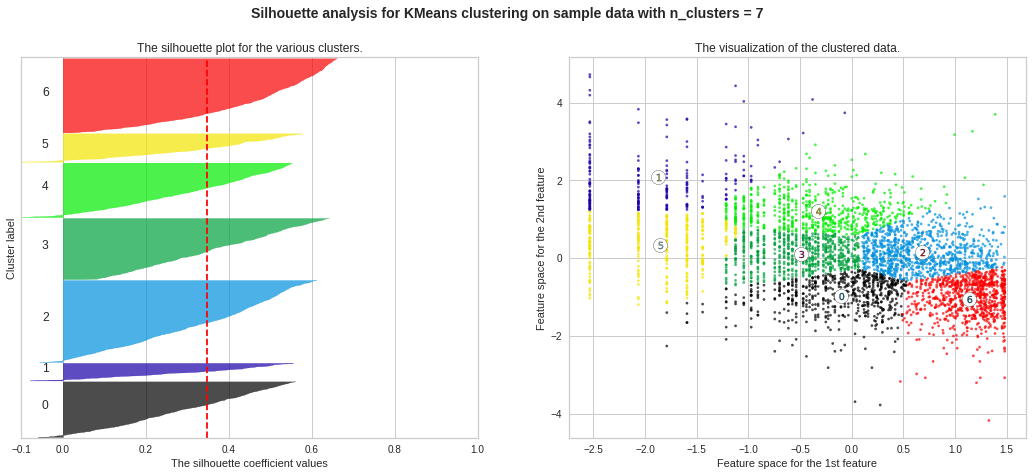

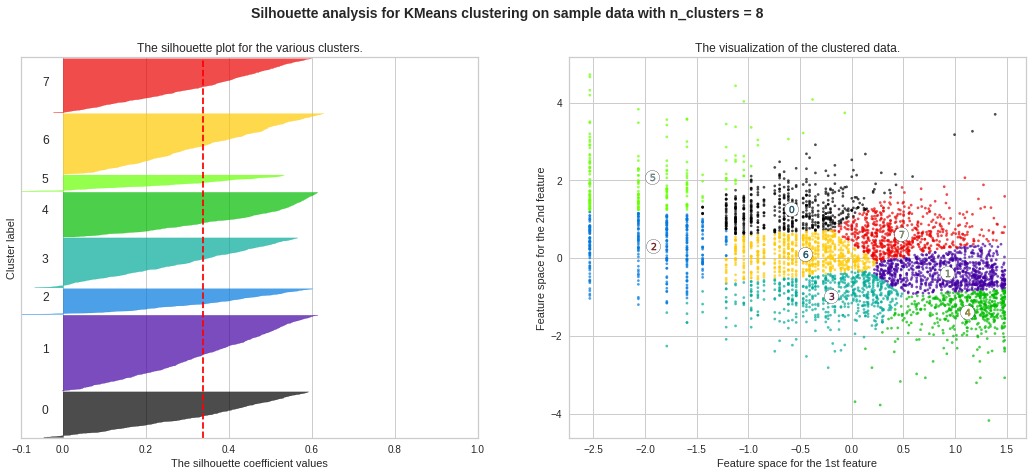

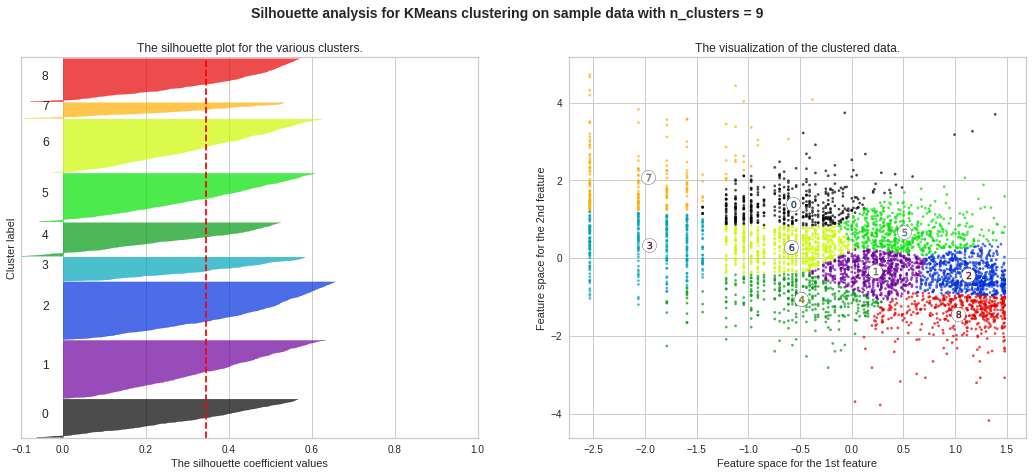

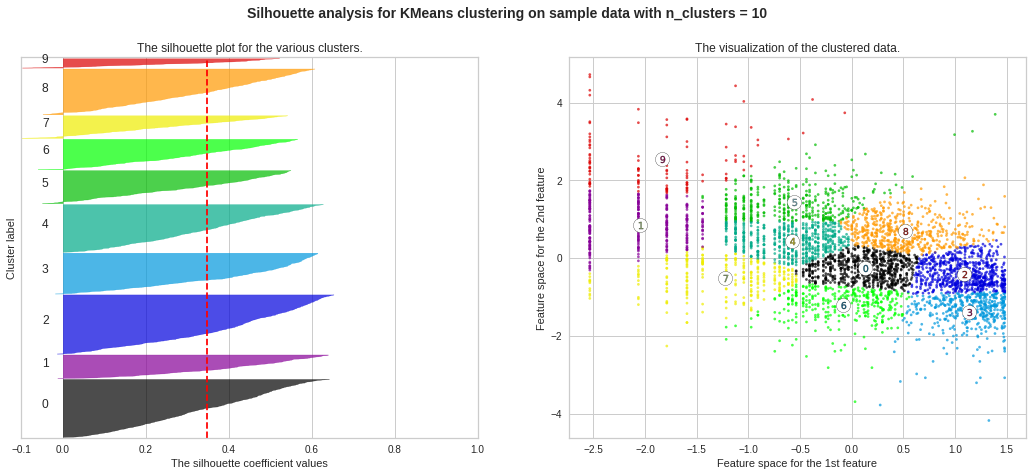

In [94]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


#We got good Silhouette plot for Cluster-2 but still few datapoints are on the negative side of the Silhouette Coefficient value as shown in below figure. but its better than others
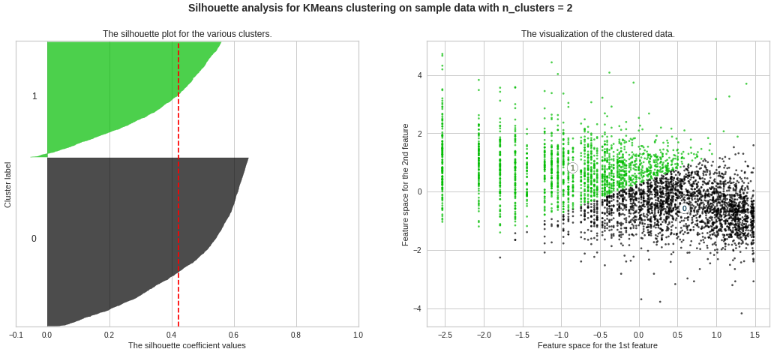

#So giving n_clusters=2 on Kmeans Model.

In [95]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters=2)
kmeans_rec_mon.fit(X)
y_kmeans= kmeans_rec_mon.predict(X)

In [96]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_rec_mon'] = kmeans_rec_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  
CustomerID                         
12346.0                         1  
12347.0                         1  
12348.0                         1  
12349.0                         1  
12350.0                         0  
12352.0                         1  
12353.0                         0  
12354.0                         0  
12355.0                         0  
12356.0                         1

In [97]:
# Centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[ 0.58227699, -0.56891005],
       [-0.85127442,  0.83173229]])

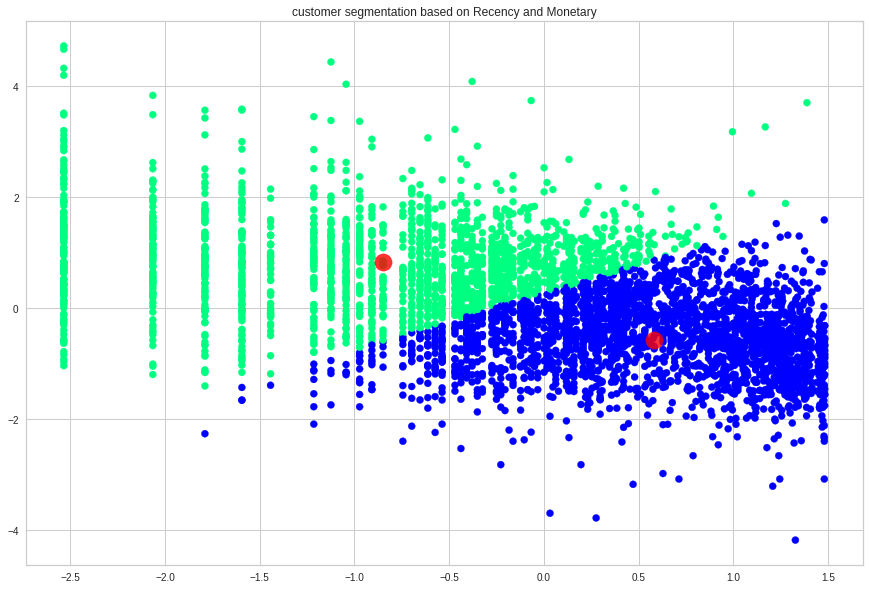

In [99]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)
plt.show()

#   **2) DBSCAN Algorithm on Recency and Monetary**

In [100]:
#importing necessary library
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [101]:
#eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 76
Silhouette Coefficient: 0.405


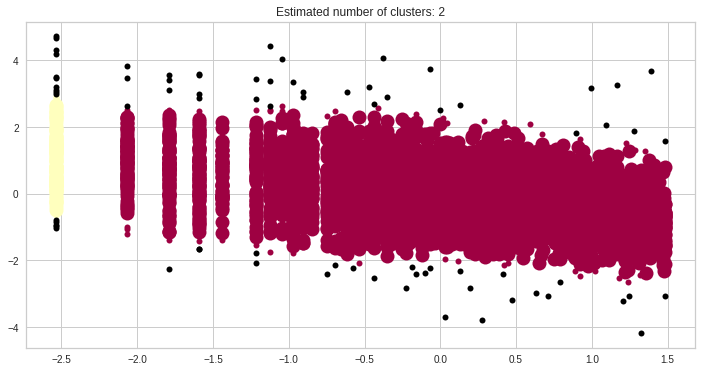

In [102]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

#----------------------------------------***Frequency and Monetary***-------------------------------

# **1) KMeans Clustering**

Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

##***A)  Applying Elbow Method on Frequency and Monetary.***

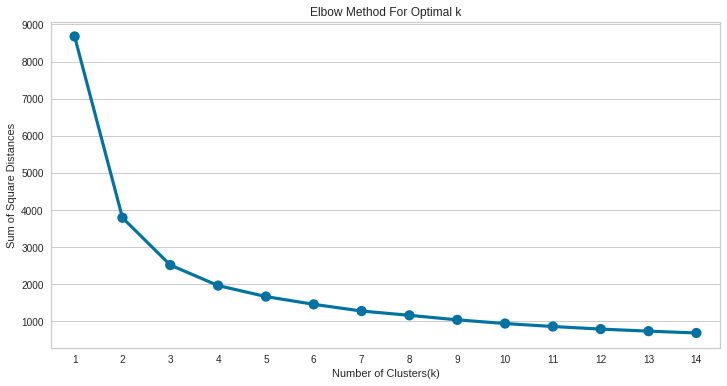

In [103]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##**Here we can see that Optimal value for cluster came out to be 2.**

#Cross verifying with ElbowVisualizar

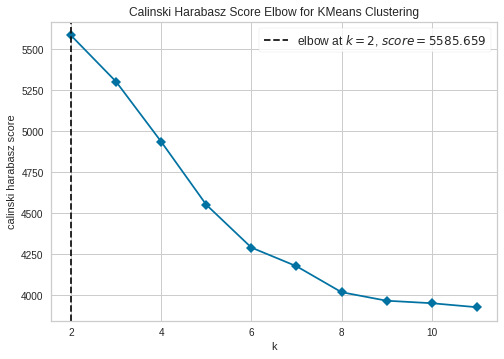

In [105]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

#Elbow Visulaizer also giving cluster=2

##**Silhouette Score** ***(Validating Above optimal cluster value(i.e optimal_cluster=2)***

In [106]:
# taking Recency and Monetory_log in list.
Recency_and_Monetary_feat=['Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.478535709506603
For n_clusters = 3, silhouette score is 0.40764120562174455
For n_clusters = 4, silhouette score is 0.3715810384601166
For n_clusters = 5, silhouette score is 0.3442965607959301
For n_clusters = 6, silhouette score is 0.3586829219947334
For n_clusters = 7, silhouette score is 0.34342098057749704
For n_clusters = 8, silhouette score is 0.3500546906243836
For n_clusters = 9, silhouette score is 0.34419928062567495
For n_clusters = 10, silhouette score is 0.36238664926507114
For n_clusters = 11, silhouette score is 0.3682455762844025
For n_clusters = 12, silhouette score is 0.3534862139672636
For n_clusters = 13, silhouette score is 0.36139542577471895
For n_clusters = 14, silhouette score is 0.3486849890768239
For n_clusters = 15, silhouette score is 0.3628225939841498


#Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)

For n_clusters = 2 The average silhouette_score is : 0.478535709506603
For n_clusters = 3 The average silhouette_score is : 0.40764120562174455
For n_clusters = 4 The average silhouette_score is : 0.3715810384601166
For n_clusters = 5 The average silhouette_score is : 0.3442965607959301
For n_clusters = 6 The average silhouette_score is : 0.3586829219947334
For n_clusters = 7 The average silhouette_score is : 0.34342098057749704
For n_clusters = 8 The average silhouette_score is : 0.3500546906243836
For n_clusters = 9 The average silhouette_score is : 0.34419928062567495
For n_clusters = 10 The average silhouette_score is : 0.36238664926507114


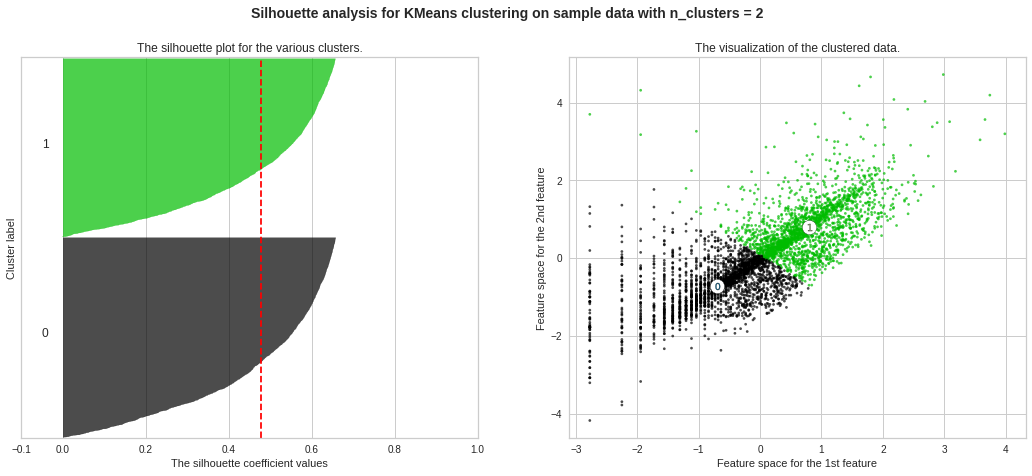

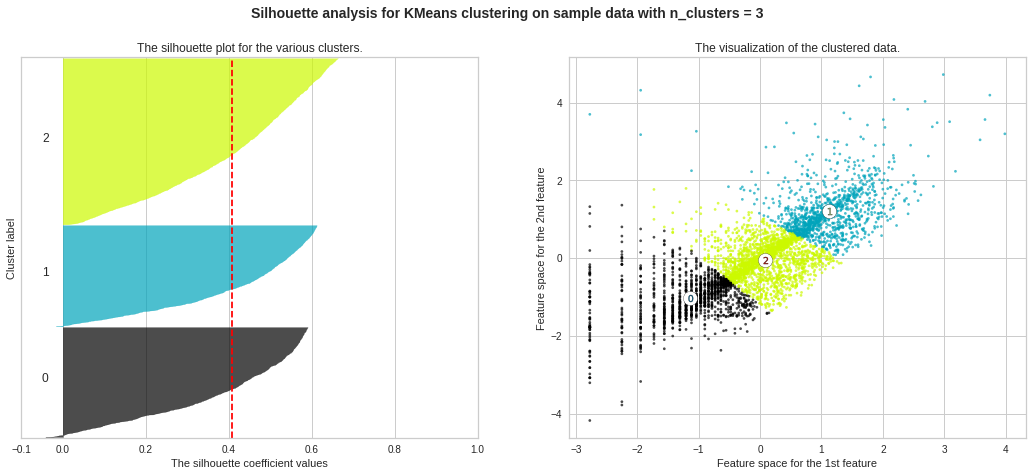

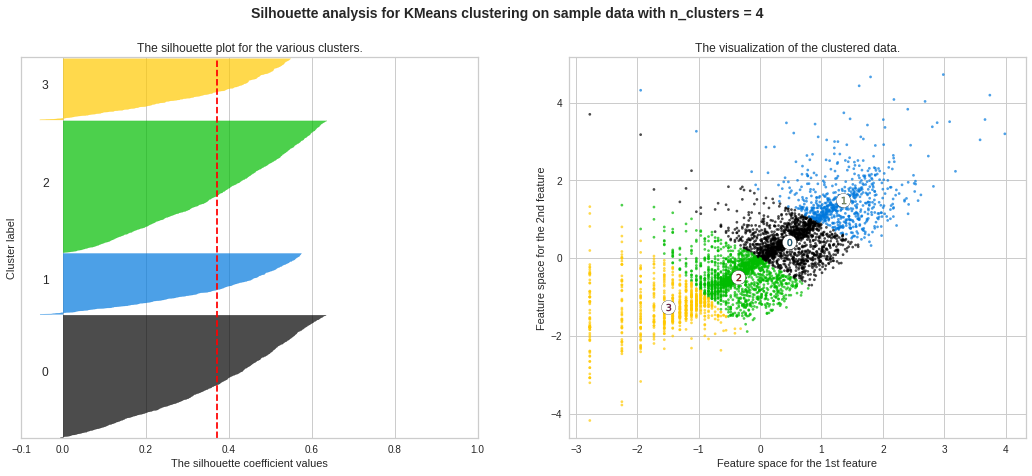

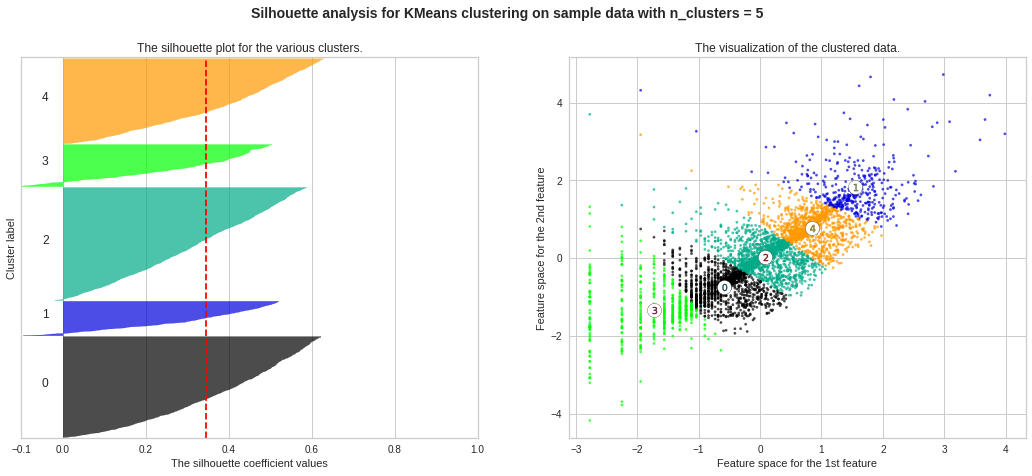

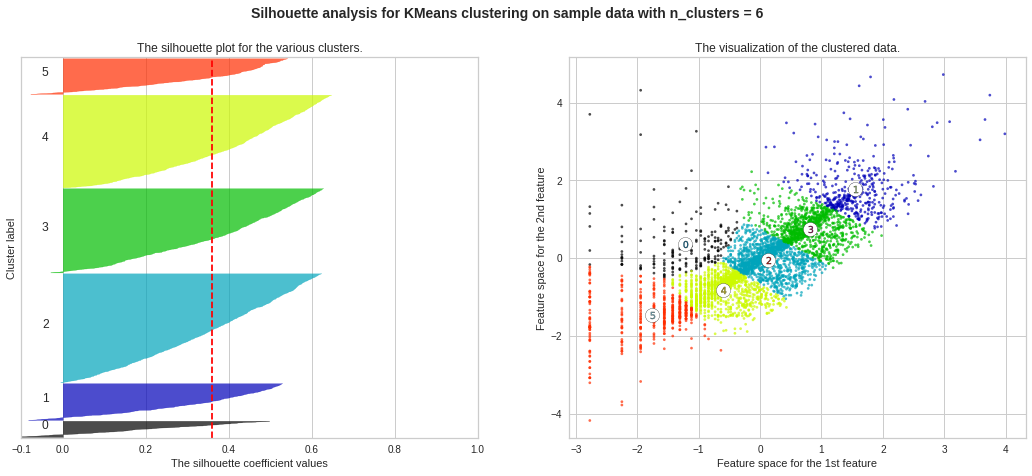

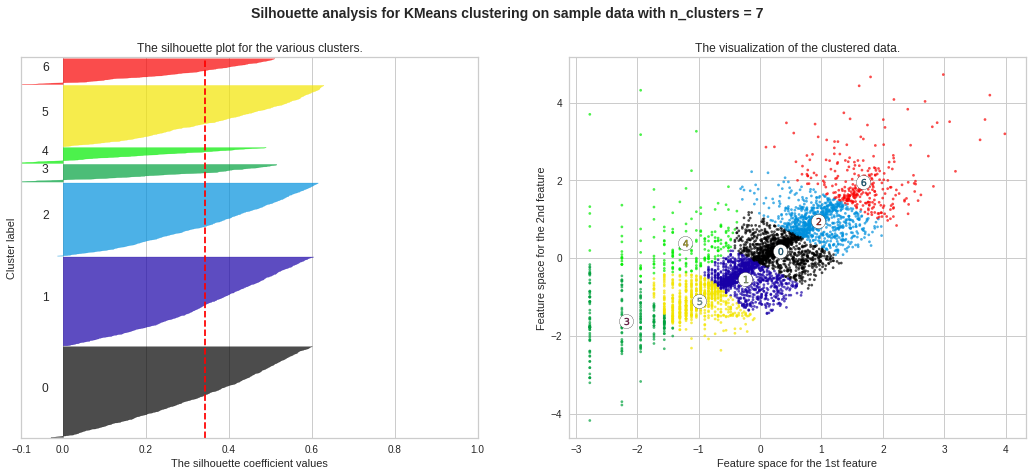

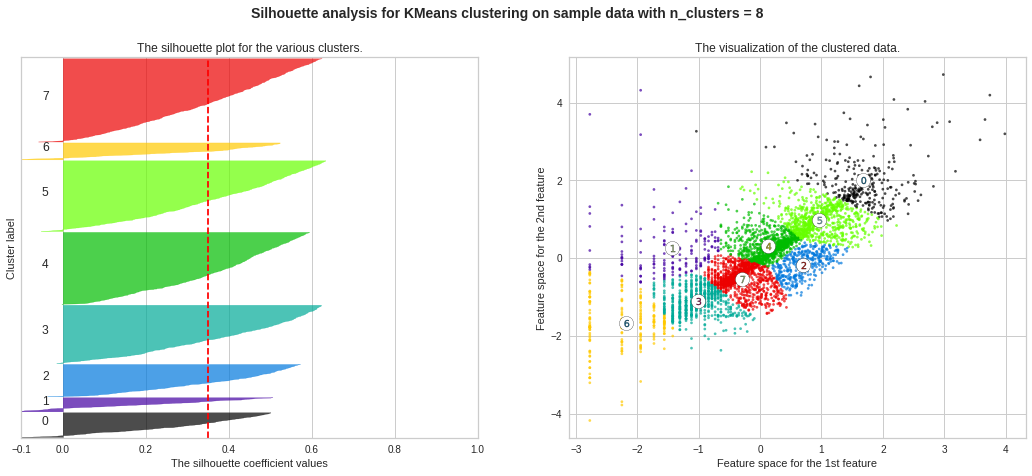

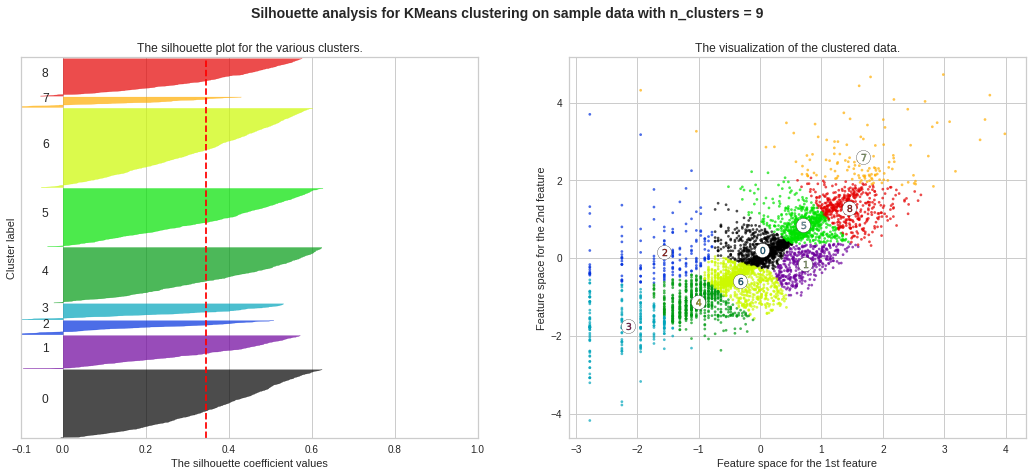

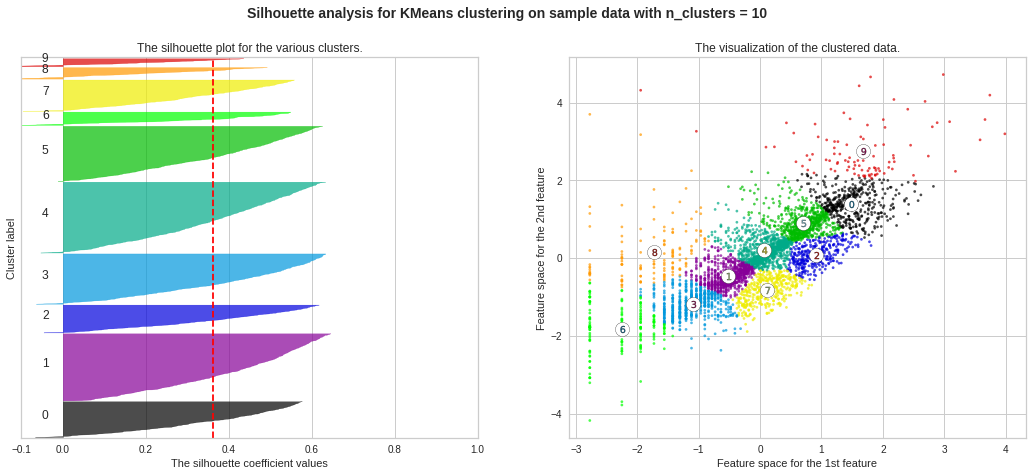

In [107]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* # Silhouette Plot for Frequency and Monetary with cluster=2 is very good as compared to Recency and Monetary's Silhouette plot.
* # No datapoints are on the negative side of the Silhouette Coefficent values.
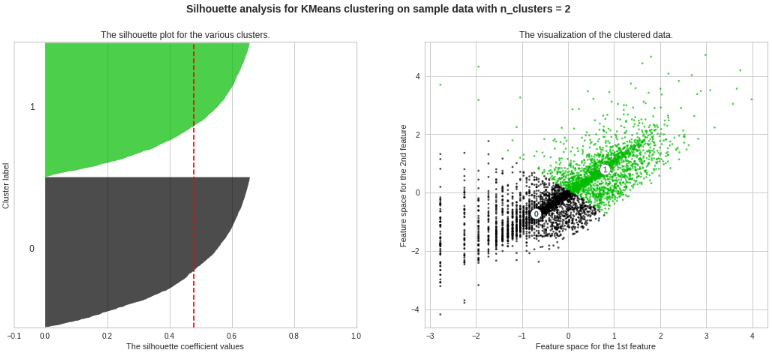

#So giving n_clusters=2 on Kmeans Model.

In [108]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon = KMeans(n_clusters=2)
kmeans_freq_mon.fit(X)
y_kmeans= kmeans_freq_mon.predict(X)

In [109]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon'] = kmeans_freq_mon.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  
CustomerID                                                    
12346.0                         1                          0  
12347.0                         1                          0  
12348.0                         1                          0  
12349.0                         1                          0  
12350.0                         0                          1  
12352.0                         1                          0  
12353.0                         0                          1  
12354.0                         0                          0  
12355.0                         0                          1  
12356.0                         1                          0

In [110]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon.cluster_centers_
centers

array([[ 0.79016407,  0.79810393],
       [-0.70535589, -0.71244356]])

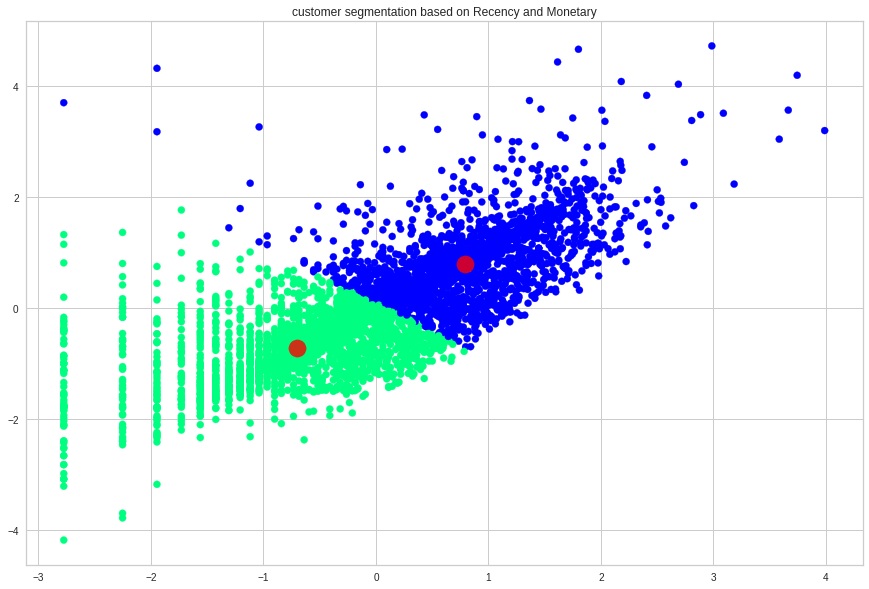

In [111]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)

# **2) DBSCAN Algorithm on Frequency and Monetary**

In [112]:
#eps value is the radius value for the datapoint from which circle is drwan and min sample indicates how many datapoints should be consider to consider that point in cluster.
#codesource(sklearn documentation)
db = DBSCAN(eps=0.5, min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 47
Silhouette Coefficient: 0.426


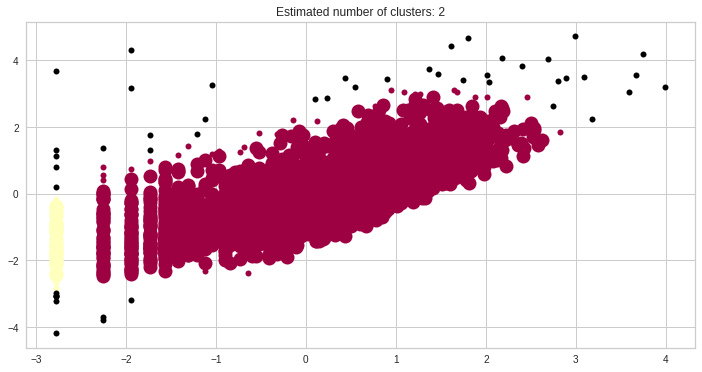

In [113]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )
    plt.title("Estimated number of clusters: %d" % n_clusters_)

plt.show()

# -------------------------------**Recency, Frequency and Monetary**-------------------

# **1) KMeans Clustering**

#Before implementing the Kmeans Clustering alogorthm we need to decide the number of clusters to put inside algorithm as input. So we will be finding the minmum number of clusters required by using Elbow method.

#***A) Applying Elbow Method on Recency, Frequency and Monetary.***

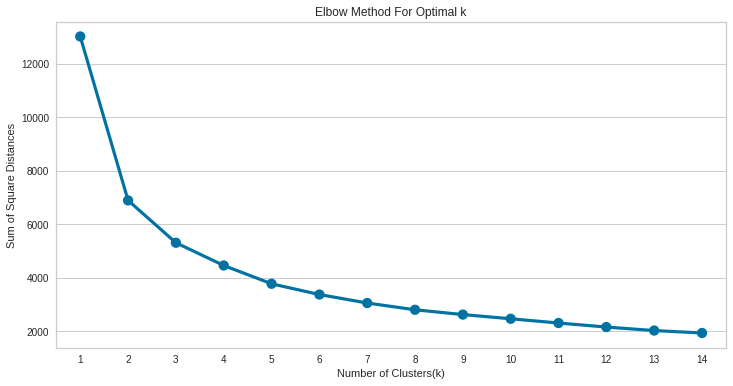

In [114]:
# taking Recency_log, Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#applying Elbow Method
wcss = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    wcss[k] = km.inertia_


#Plot the graph for the sum of square distance values and Number of Clusters
plt.figure(figsize=(12,6))
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# **Here we can see that Optimal value for cluster came out to be 2.**

#Cross verifying with ElbowVisualizar

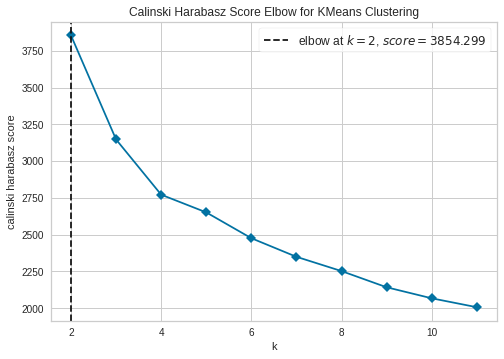

In [117]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
plt.show()

#Elbow Visulaizer also giving cluster=2

# **Silhouette Score (Validating Above optimal cluster value(i.e optimal_cluster=2)**

In [118]:
# taking Recency_log,Frequency_log and Monetory_log in list.
Recency_and_Monetary_feat=['Recency_log','Frequency_log','Monetary_log']

# taking only values of recency and monetory in X.
X=rfm_dataframe[Recency_and_Monetary_feat].values

# standardising the data
scaler=StandardScaler()
X=scaler.fit_transform(X)

#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.39597280345877467
For n_clusters = 3, silhouette score is 0.30306623428198437
For n_clusters = 4, silhouette score is 0.30188282895683416
For n_clusters = 5, silhouette score is 0.2787783127811271
For n_clusters = 6, silhouette score is 0.2789560652501828
For n_clusters = 7, silhouette score is 0.26251570956441783
For n_clusters = 8, silhouette score is 0.26604516508252274
For n_clusters = 9, silhouette score is 0.25334399829461035
For n_clusters = 10, silhouette score is 0.2594507943913136
For n_clusters = 11, silhouette score is 0.261084644577631
For n_clusters = 12, silhouette score is 0.2630954807140074
For n_clusters = 13, silhouette score is 0.2629821003752366
For n_clusters = 14, silhouette score is 0.26165526187324323
For n_clusters = 15, silhouette score is 0.2561927031281945


#Here we can see the for n_cluster=2 silhouette score is good as compared to others.(if values is close to 1 means data points are clustered very well to respective clusters and distance of that datapoint is very far from the other cluster.)

For n_clusters = 2 The average silhouette_score is : 0.39597280345877467
For n_clusters = 3 The average silhouette_score is : 0.30306623428198437
For n_clusters = 4 The average silhouette_score is : 0.30188282895683416
For n_clusters = 5 The average silhouette_score is : 0.2787783127811271
For n_clusters = 6 The average silhouette_score is : 0.2789560652501828
For n_clusters = 7 The average silhouette_score is : 0.26251570956441783
For n_clusters = 8 The average silhouette_score is : 0.26604516508252274
For n_clusters = 9 The average silhouette_score is : 0.25334399829461035
For n_clusters = 10 The average silhouette_score is : 0.2594507943913136


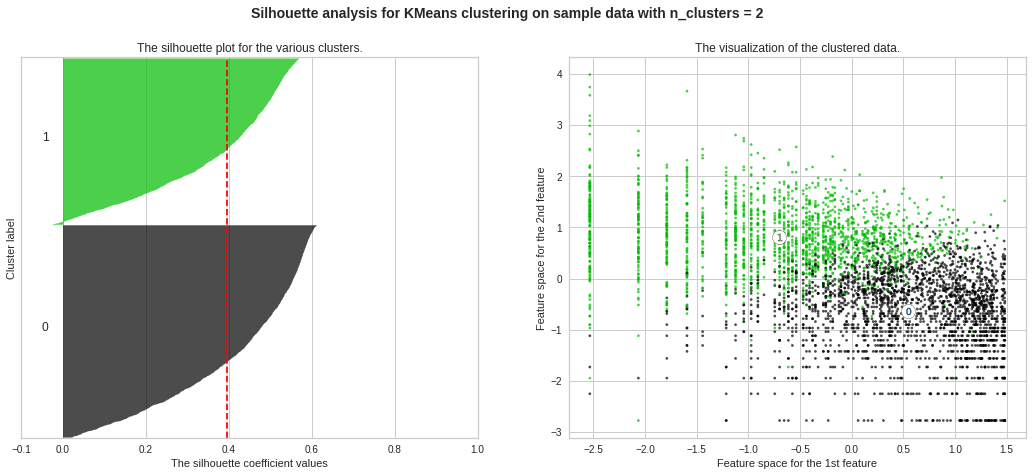

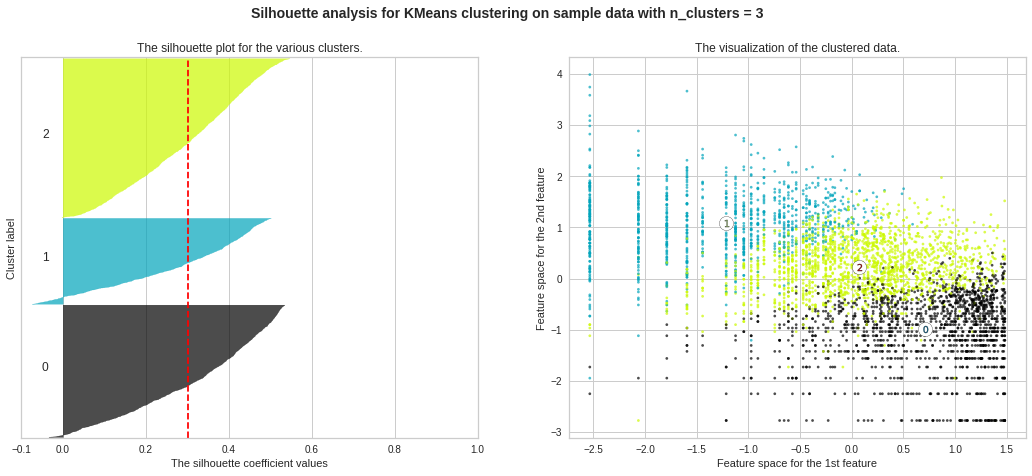

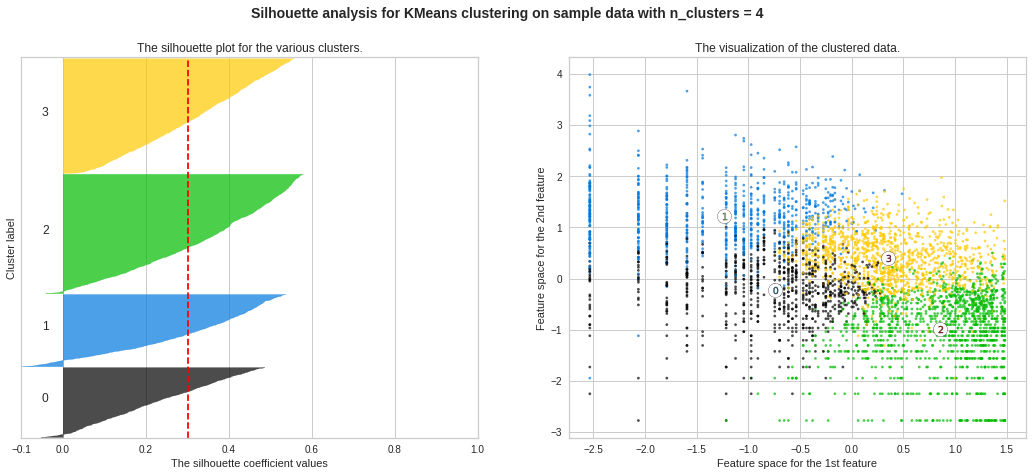

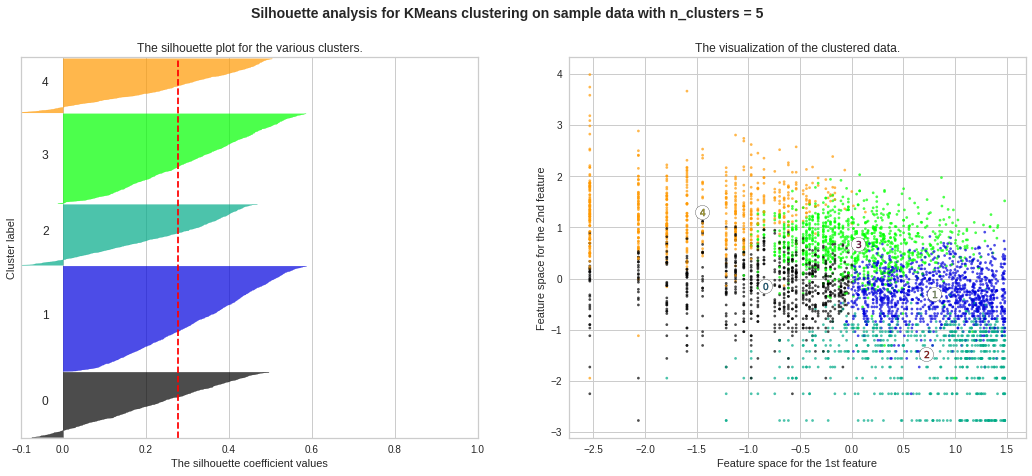

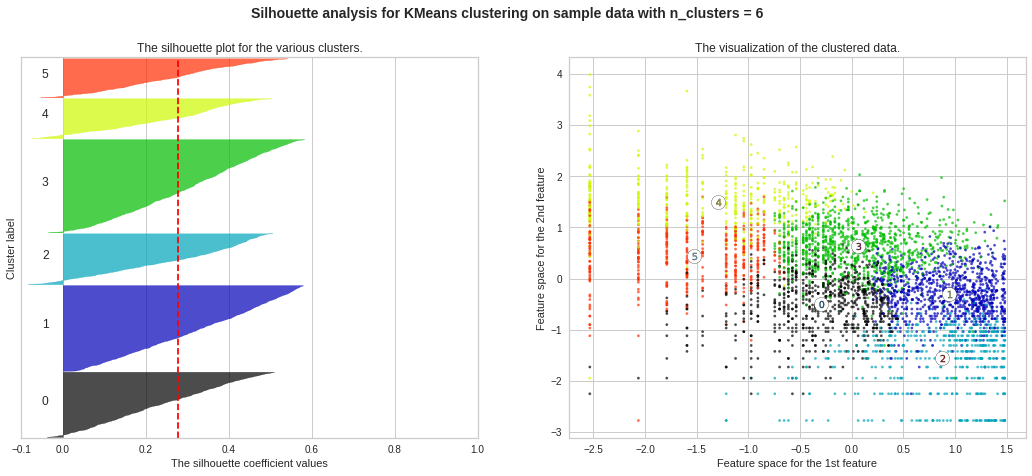

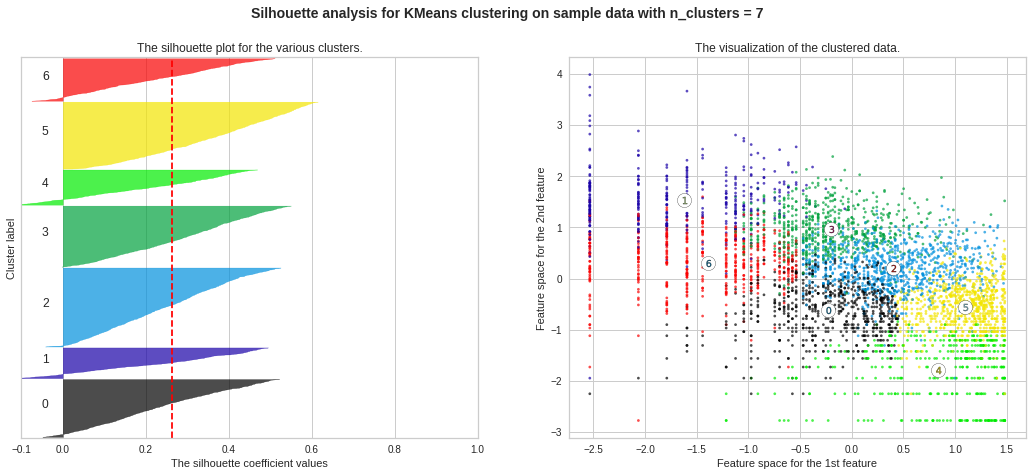

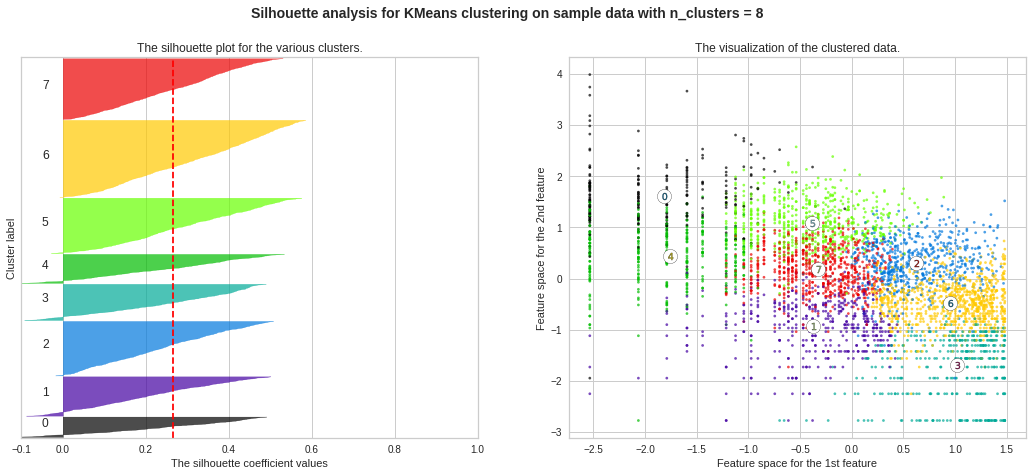

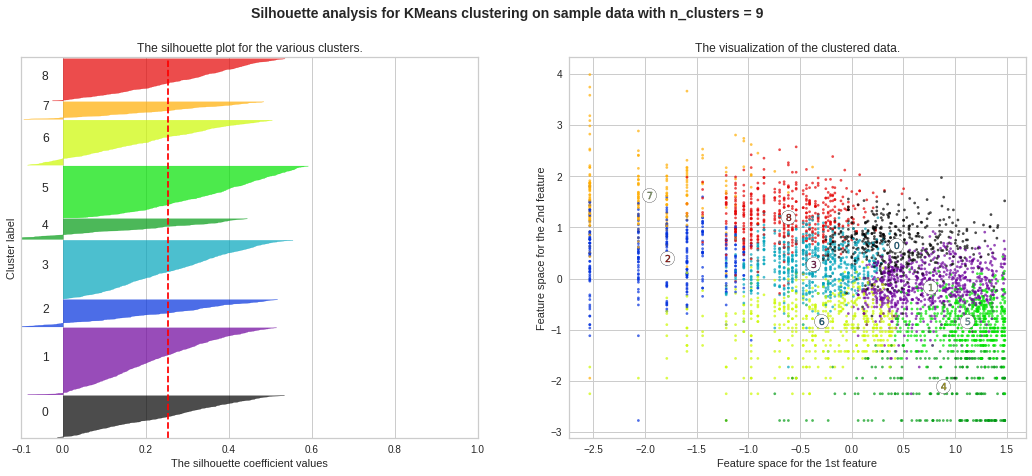

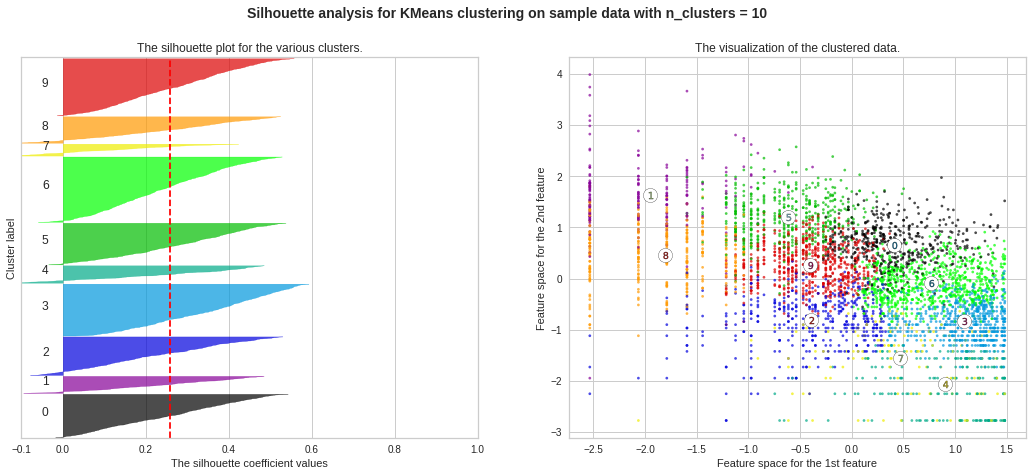

In [119]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


* # Silhouette Plot for Frequency and Monetary with cluster=2 is good.
* # Still Few datapoints are on the negative side of the Silhouette Coefficent values(see below image). Still we can consider the clusters.
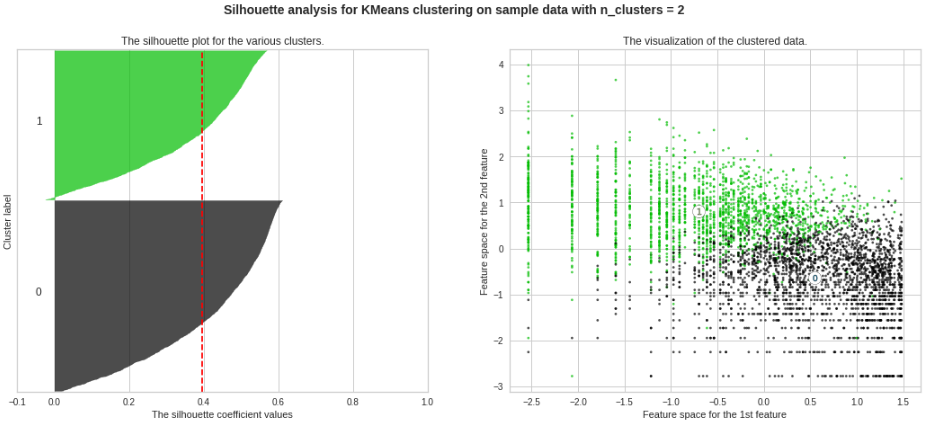

# **So giving n_clusters=2 on Kmeans Model.**

In [120]:
# applying Kmeans_clustering algorithm
kmeans_freq_mon_rec = KMeans(n_clusters=2)
kmeans_freq_mon_rec.fit(X)
y_kmeans= kmeans_freq_mon_rec.predict(X)

In [121]:
#Find the clusters for the observation given in the dataset
rfm_dataframe['Cluster_based_on_freq_mon_rec'] = kmeans_freq_mon_rec.labels_
rfm_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Group  RFM_Score  \
CustomerID                                                               
12346.0         325          1  77183.60  4  4  1       441          9   
12347.0           2        182   4310.00  1  1  1       111          3   
12348.0          75         31   1797.24  3  3  1       331          7   
12349.0          18         73   1757.55  2  2  1       221          5   
12350.0         310         17    334.40  4  4  3       443         11   
12352.0          36         85   2506.04  2  2  1       221          5   
12353.0         204          4     89.00  4  4  4       444         12   
12354.0         232         58   1079.40  4  2  2       422          8   
12355.0         214         13    459.40  4  4  3       443         11   
12356.0          22         59   2811.43  2  2  1       221          5   

           RFM_Loyalty_Level  Recency_log  Frequency_log  Monetary_log  \
CustomerID                                                               
12346.0               Silver     5.783825       0.000000     11.253942   
12347.0            Platinaum     0.693147       5.204007      8.368693   
12348.0                 Gold     4.317488       3.433987      7.494007   
12349.0            Platinaum     2.890372       4.290459      7.471676   
12350.0                Bronz     5.736572       2.833213      5.812338   
12352.0            Platinaum     3.583519       4.442651      7.826459   
12353.0                Bronz     5.318120       1.386294      4.488636   
12354.0                 Gold     5.446737       4.060443      6.984161   
12355.0                Bronz     5.365976       2.564949      6.129921   
12356.0            Platinaum     3.091042       4.077537      7.941449   

            Cluster_based_rec_mon  Cluster_based_on_freq_mon  \
CustomerID                                                     
12346.0                         1                          0   
12347.0                         1                          0   
12348.0                         1                          0   
12349.0                         1                          0   
12350.0                         0                          1   
12352.0                         1                          0   
12353.0                         0                          1   
12354.0                         0                          0   
12355.0                         0                          1   
12356.0                         1                          0   

            Cluster_based_on_freq_mon_rec  
CustomerID                                 
12346.0                                 1  
12347.0                                 0  
12348.0                                 1  
12349.0                                 0  
12350.0                                 1  
12352.0                                 0  
12353.0                                 1  
12354.0                                 1  
12355.0                                 1  
12356.0                                 0

In [122]:
# Centers of the clusters(coordinates)
centers = kmeans_freq_mon_rec.cluster_centers_
centers

array([[-0.68580838,  0.79910102,  0.80063943],
       [ 0.55327398, -0.6446725 , -0.64591361]])

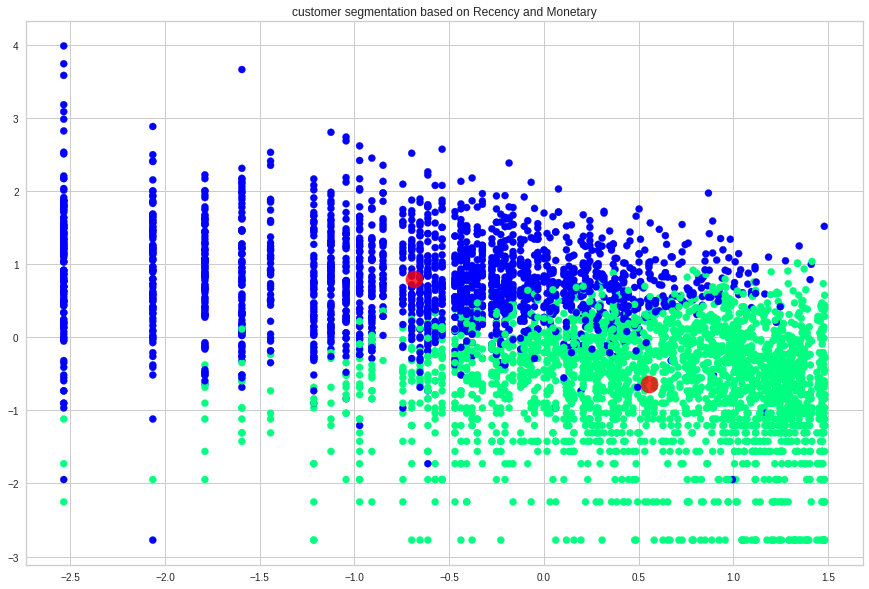

In [123]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='winter')

centers = kmeans_freq_mon_rec.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.8)